![](https://media.giphy.com/media/dVuyBgq2z5gVBkFtDc/giphy.gif)

**Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.COVID-19 is the infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019.**
* [Source](https://www.who.int/news-room/q-a-detail/q-a-coronaviruses)

# Coronavirus in the World

In [1]:
import pandas as pd 
cases = pd.read_csv("covid_19_data.csv")
import plotly.offline as py
import plotly.express as px


py.init_notebook_mode(connected=True)

grp = cases.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
# print(grp)
grp = grp.reset_index()
# print(grp)
grp['Date'] = pd.to_datetime(grp['ObservationDate'])
grp['Date'] = grp['Date'].dt.strftime('%m/%d/%Y')
grp['Active'] = grp['Confirmed'] - grp['Recovered'] - grp['Deaths']
grp['Country'] =  grp['Country/Region']
# print(grp)

fig = px.choropleth(grp, locations="Country", locationmode='country names', 
                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths,grp.Active],projection="mercator",
                     animation_frame="Date",width=1000, height=700,
                     color_continuous_scale='Reds',
                     range_color=[1000,50000],

                     title='World Map of Coronavirus')

fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# **Related Work**
 * For Analysis on Coronavirus(Canada), Click [here](https://www.kaggle.com/vanshjatana/coronavirus-in-canada)
* For Analysis and Prediction on Coronavirus(Italy), Click [here](https://www.kaggle.com/vanshjatana/analysis-and-prediction-on-coronavirus-italy?scriptVersionId=29892166)
*  For Analysis and Prediction on Coronavirus(Iran), Click [here](https://www.kaggle.com/vanshjatana/analysis-and-prediction-on-coronavirus-iran)
*  For Machine Learning on Cornovirus, Click [here](https://www.kaggle.com/vanshjatana/machine-learning-on-coronavirus)
*  For report on Coronavirus, Click [here](https://www.researchgate.net/publication/339738108_Analysis_On_Coronavirus)

# **SOUTH KOREA**

                                         **Current Scenario**
The accumulated confirmation count in South korea is increasing exponentially after 22nd of feb. Till the date 15th of feb 2020 it was negligible. There are many reason for infection but most cases have similar reasons that they have visited to wuhan. South Korea has raised its coronavirus alert to the "highest level" as confirmed case numbers keep rising.South Korea has seen the largest number of confirmed cases after China. More than 4,800 people have confirmed the infection of coronavirus.  As the data set says the western part of the country is more affected. Daegu and Gyeongsangbukdo region of South Korea are highly infected by the coronavirus

**Libraries**

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

Using TensorFlow backend.


# **Symptoms of Coronavirus**
 * [Source](http://en.wikipedia.org/wiki/Coronavirus_disease_2019)

In [3]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))
symptoms

symptom  percentage
0                     Fever        87.9
1                 Dry cough        67.7
2                   Fatigue        38.1
3         Sputum production        33.4
4       Shortness of breath        18.6
5               Muscle pain        14.8
6               Sore throat        13.9
7                  Headache        13.6
8                    Chills        11.4
9        Nausea or vomiting         5.0
10         Nasal congestion         4.8
11                Diarrhoea         3.7
12              Haemoptysis         0.9
13  Conjunctival congestion         0.8

**Bar Chart**

In [4]:
fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             y="percentage", x="symptom", color='symptom', 
             log_y=True, template='ggplot2', title='Symptom of  Coronavirus')
fig.show()

**Pie Chart**

In [5]:
fig = px.pie(symptoms,
             values="percentage",
             names="symptom",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

**Tree Plot**

In [6]:
fig = px.treemap(symptoms, path=['symptom'], values='percentage',
                  color='percentage', hover_data=['symptom'],
                  color_continuous_scale='Rainbow')
fig.show()

<Figure size 720x432 with 0 Axes>

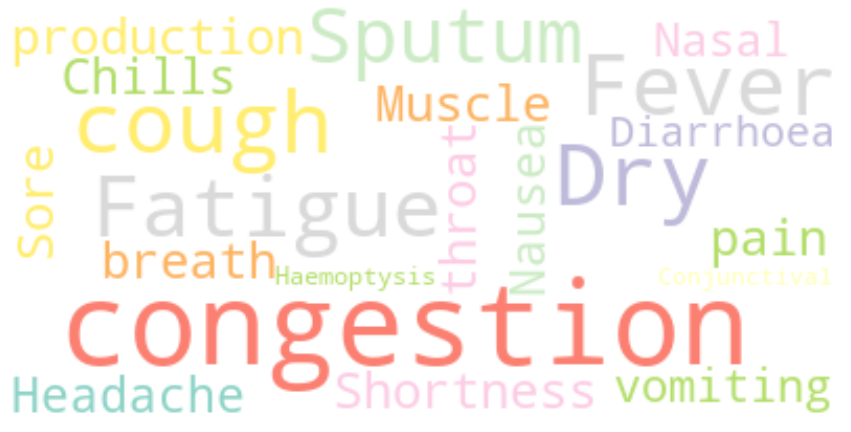

In [7]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in symptoms.symptom)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [8]:
comp = pd.read_excel('COVID-19-3.27-top30-500.xlsx') #Read excel file to dataframe
# print(comp)

In [9]:
df_patient = pd.read_csv("patient.csv")
# print(df_patient)
df_route = pd.read_csv("route.csv")
# print(df_route)

In [10]:
weather = pd.read_csv("Weather.csv")
print(weather)

        code          province        date  avg_temp  min_temp  max_temp  \
0      10000             Seoul  2016-01-01       1.2      -3.3       4.0   
1      11000             Busan  2016-01-01       5.3       1.1      10.9   
2      12000             Daegu  2016-01-01       1.7      -4.0       8.0   
3      13000           Gwangju  2016-01-01       3.2      -1.5       8.1   
4      14000           Incheon  2016-01-01       3.1      -0.4       5.7   
...      ...               ...         ...       ...       ...       ...   
25130  50000      Jeollabuk-do  2020-04-19      11.2       8.0      16.1   
25131  51000      Jeollanam-do  2020-04-19      12.0      10.6      13.4   
25132  60000  Gyeongsangbuk-do  2020-04-19      10.2       5.5      15.0   
25133  61000  Gyeongsangnam-do  2020-04-19      11.1       9.6      14.2   
25134  70000           Jeju-do  2020-04-19      13.3      11.0      15.6   

       precipitation  max_wind_speed  most_wind_direction  \
0                0.0      

# **Looking into patient data**

In [11]:
df_patient.head()  

id     sex  birth_year country               region group infection_reason  \
0   1  female      1984.0   China  filtered at airport   NaN   visit to Wuhan   
1   2    male      1964.0   Korea  filtered at airport   NaN   visit to Wuhan   
2   3    male      1966.0   Korea         capital area   NaN   visit to Wuhan   
3   4    male      1964.0   Korea         capital area   NaN   visit to Wuhan   
4   5    male      1987.0   Korea         capital area   NaN   visit to Wuhan   

   infection_order  infected_by  contact_number confirmed_date released_date  \
0              1.0          NaN            45.0     2020-01-20    2020-02-06   
1              1.0          NaN            75.0     2020-01-24    2020-02-05   
2              1.0          NaN            16.0     2020-01-26    2020-02-12   
3              1.0          NaN            95.0     2020-01-27    2020-02-09   
4              1.0          NaN            31.0     2020-01-30    2020-03-02   

  deceased_date     state  
0           NaN  released  
1           NaN  released  
2           NaN  released  
3           NaN  released  
4           NaN  released

1.  **id** the ID of the patient (n-th confirmed patient)
2.  **sex** the sex of the patient
3.  **birth_year** the birth year of the patient
4.  **country** the country of the patient
5.  **region** the region of the patient
6.  **group** the collective infection
7.  **infection_reason** the reason of infection
8.  **infection_order** the order of infection
9.  **infected_by** the ID of who has infected the patient
10. **contact_number** the number of contacts with people
11. **confirmed_date** the date of confirmation
12. **released_date** the date of discharge
13. **deceased_date** the date of decease
14. **state** isolated / released / deceased

**Checking null value**

In [12]:
df_patient.isna().sum()


id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

In [13]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
# print(df_patient['birth_year'])
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val: val if val > 0 else np.nan)
# print(df_patient['birth_year'])

In [109]:
df_patient.confirmed_date = pd.to_datetime(df_patient.confirmed_date)
daily_count = df_patient.groupby(df_patient.confirmed_date).id.count()
print(daily_count)
accumulated_count = daily_count.cumsum()
# print(accumulated_count)



        id     sex  birth_year country               region group  \
0        1  female      1984.0   China  filtered at airport   NaN   
1        2    male      1964.0   Korea  filtered at airport   NaN   
2        3    male      1966.0   Korea         capital area   NaN   
3        4    male      1964.0   Korea         capital area   NaN   
4        5    male      1987.0   Korea         capital area   NaN   
...    ...     ...         ...     ...                  ...   ...   
5323  5324     NaN         NaN   Korea                  NaN   NaN   
5324  5325     NaN         NaN   Korea                  NaN   NaN   
5325  5326     NaN         NaN   Korea                  NaN   NaN   
5326  5327     NaN         NaN   Korea                  NaN   NaN   
5327  5328     NaN         NaN   Korea                  NaN   NaN   

     infection_reason  infection_order  infected_by  contact_number  ...  \
0      visit to Wuhan              1.0          NaN            45.0  ...   
1      visit to Wuh

**Age**

In [15]:
df_patient['age'] = 2020 - df_patient['birth_year'] 
df_patient['age'].head()

0    36.0
1    56.0
2    54.0
3    56.0
4    33.0
Name: age, dtype: float64

**Age Range**

In [16]:
import math
def group_age(age):
    if age >= 0: # not NaN
        if age % 10 != 0:
            lower = int(math.floor(age / 10.0)) * 10
            upper = int(math.ceil(age / 10.0)) * 10 - 1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age + 9) 
            return f"{lower}-{upper}"
    return "Unknown"


df_patient["age_range"] = df_patient["age"].apply(group_age)
df_patient["age_range"].head()
print(df_patient["age_range"])

0         30-39
1         50-59
2         50-59
3         50-59
4         30-39
         ...   
5323    Unknown
5324    Unknown
5325    Unknown
5326    Unknown
5327    Unknown
Name: age_range, Length: 5328, dtype: object


In [17]:
patient=df_patient
# print(patient)

**Preprocessing**

In [18]:
date_cols = ["confirmed_date", "released_date", "deceased_date"]
for col in date_cols:
    patient[col] = pd.to_datetime(patient[col])

In [19]:
patient["time_to_release_since_confirmed"] = patient["released_date"] - patient["confirmed_date"]

patient["time_to_death_since_confirmed"] = patient["deceased_date"] - patient["confirmed_date"]

patient["duration_since_confirmed"] = patient[["time_to_release_since_confirmed", "time_to_death_since_confirmed"]].min(axis=1)
patient["duration_days"] = patient["duration_since_confirmed"].dt.days
# print(patient)
age_ranges = sorted(set([ar for ar in patient["age_range"] if ar != "Unknown"]))
patient["state_by_gender"] = patient["state"] + "_" + patient["sex"]


# **Confirmed Count**

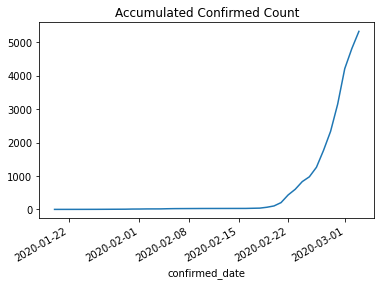

In [20]:
accumulated_count.plot()
plt.title('Accumulated Confirmed Count');

# **Time series Analysis**

In [21]:
time = pd.read_csv("covid_19_data.csv")
# print(time)

In [22]:
# time = time[time['Country/Region']=='South Korea']
time = time[time['Country/Region']=='Bangladesh']

In [23]:
time = time.tail(14)
# print(time)

In [24]:
time

SNo ObservationDate Province/State Country/Region  \
12579  12580      04/07/2020            NaN     Bangladesh   
12899  12900      04/08/2020            NaN     Bangladesh   
13219  13220      04/09/2020            NaN     Bangladesh   
13539  13540      04/10/2020            NaN     Bangladesh   
13860  13861      04/11/2020            NaN     Bangladesh   
14181  14182      04/12/2020            NaN     Bangladesh   
14501  14502      04/13/2020            NaN     Bangladesh   
14821  14822      04/14/2020            NaN     Bangladesh   
15141  15142      04/15/2020            NaN     Bangladesh   
15461  15462      04/16/2020            NaN     Bangladesh   
15781  15782      04/17/2020            NaN     Bangladesh   
16101  16102      04/18/2020            NaN     Bangladesh   
16421  16422      04/19/2020            NaN     Bangladesh   
16741  16742      04/20/2020            NaN     Bangladesh   

               Last Update  Confirmed  Deaths  Recovered  
12579  2020-04-07 23:11:31      164.0    17.0       33.0  
12899  2020-04-08 22:59:00      218.0    20.0       33.0  
13219  2020-04-09 23:09:19      330.0    21.0       33.0  
13539  2020-04-10 23:01:43      424.0    27.0       33.0  
13860  2020-04-11 22:52:46      482.0    30.0       36.0  
14181  2020-04-12 23:25:00      621.0    34.0       39.0  
14501  2020-04-13 23:15:42      803.0    39.0       42.0  
14821  2020-04-14 23:41:11     1012.0    46.0       42.0  
15141  2020-04-15 23:04:26     1231.0    50.0       49.0  
15461  2020-04-16 23:38:19     1572.0    60.0       49.0  
15781  2020-04-17 23:38:48     1838.0    75.0       58.0  
16101  2020-04-18 22:40:18     2144.0    84.0       66.0  
16421  2020-04-19 23:49:05     2456.0    91.0       75.0  
16741  2020-04-20 23:44:50     2948.0   101.0       85.0

# **Confrim vs Recovery vs Death**

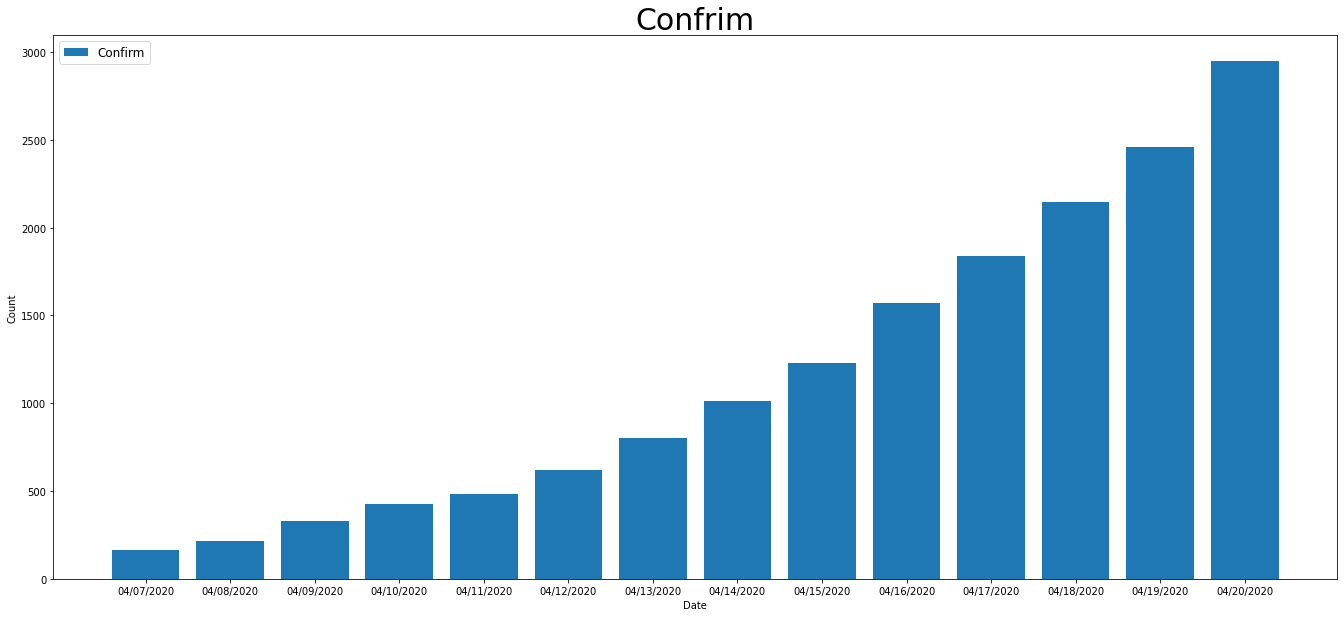

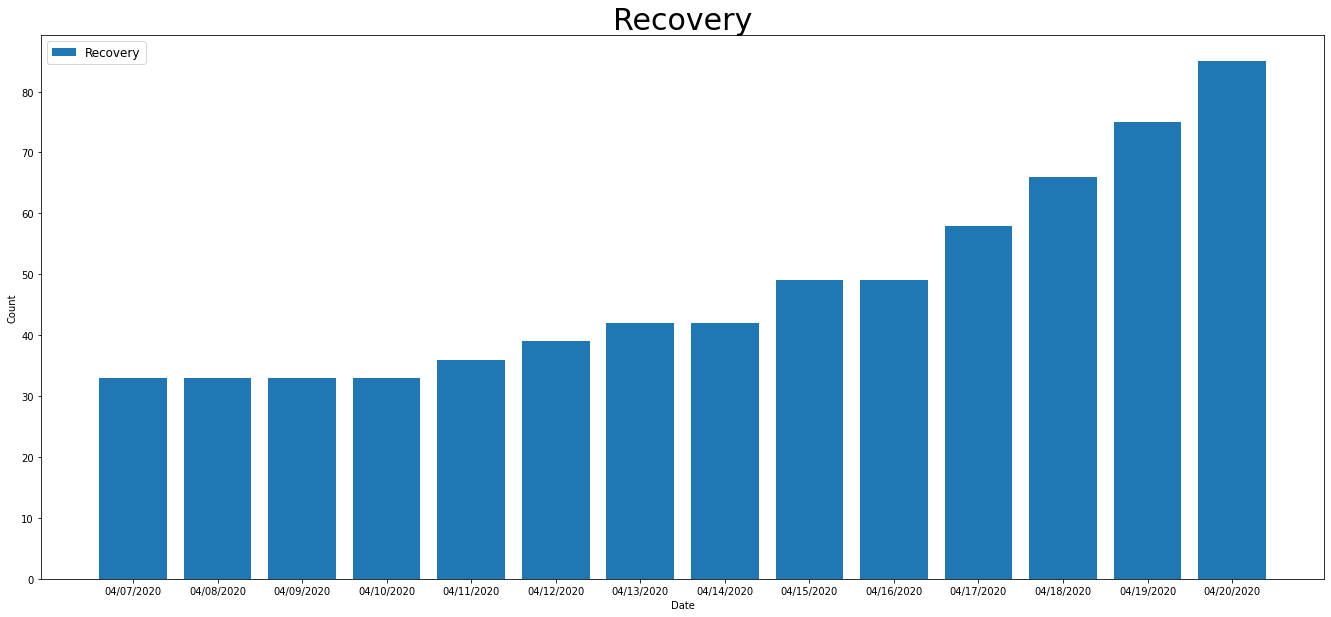

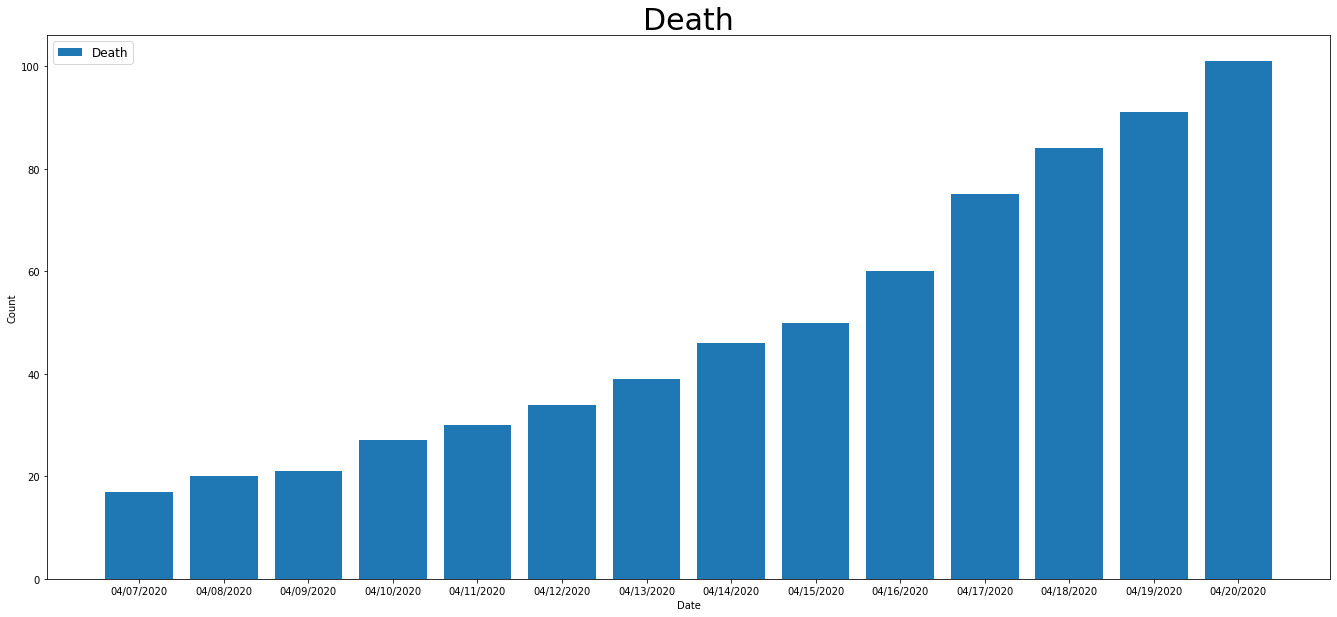

In [25]:
plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Confirmed,label="Confirm")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confrim',fontsize=30)
plt.show()


plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Recovered,label="Recovery")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovery',fontsize=30)
plt.show()

plt.figure(figsize=(23,10))

plt.bar(time.ObservationDate, time.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Death',fontsize=30)
plt.show()



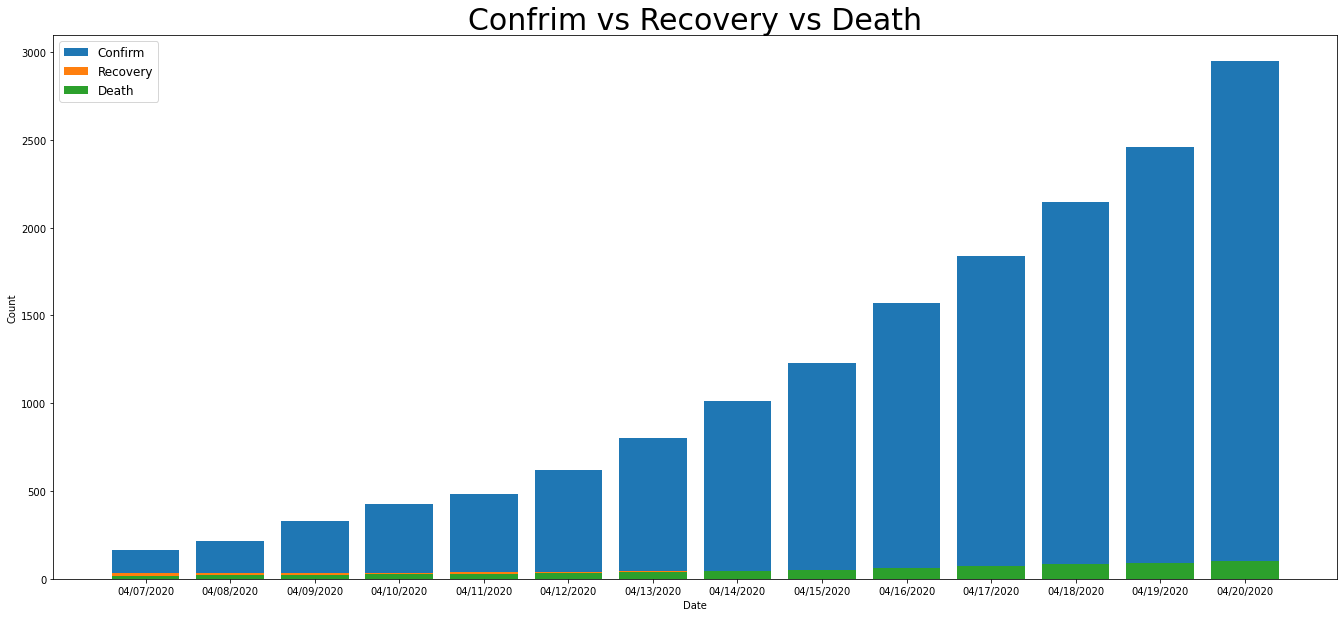

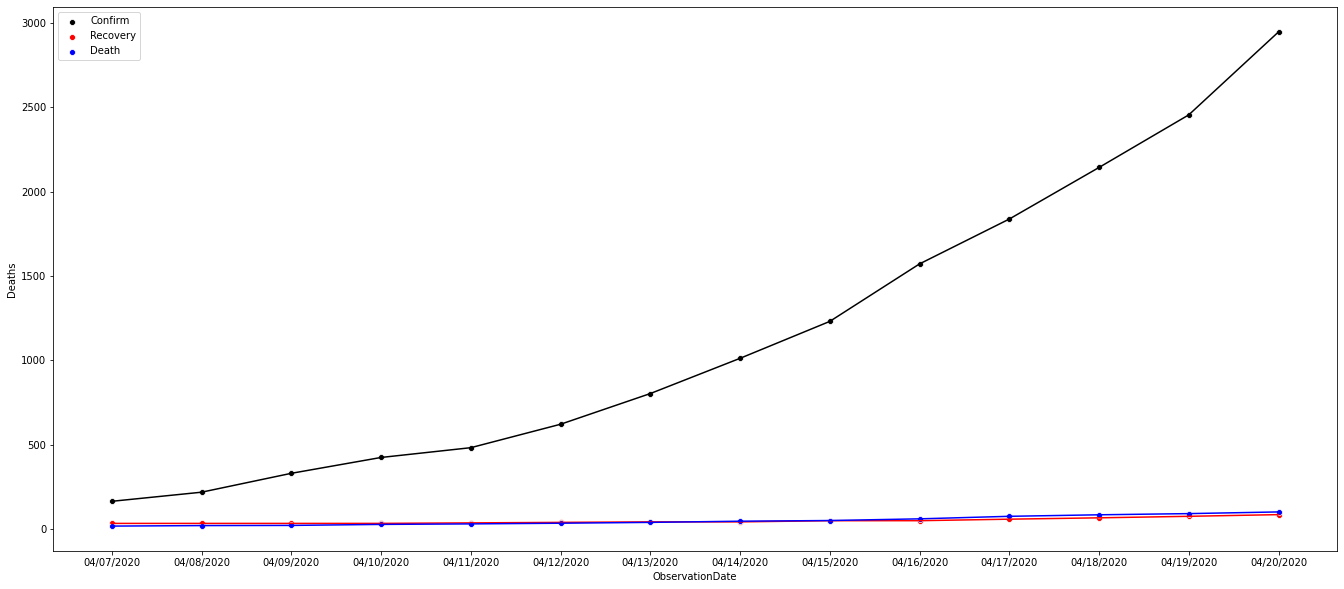

In [26]:
plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Confirmed,label="Confirm")
plt.bar(time.ObservationDate, time.Recovered,label="Recovery")
plt.bar(time.ObservationDate, time.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confrim vs Recovery vs Death',fontsize=30)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="ObservationDate", y="Confirmed", data=time,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="ObservationDate", y="Recovered", data=time,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="ObservationDate", y="Deaths", data=time,
             color="blue",label = "Death")
plt.plot(time.ObservationDate,time.Confirmed,zorder=1,color="black")
plt.plot(time.ObservationDate,time.Recovered,zorder=1,color="red")
plt.plot(time.ObservationDate,time.Deaths,zorder=1,color="blue")

In [27]:
# print(time['Confirmed'])
Total_confirmed = time['Confirmed'].max()
Total_recovered = time['Recovered'].max()
Total_death = time['Deaths'].max()
data = [['Confirmed', Total_confirmed], ['Recovered', Total_recovered], ['Death', Total_death]] 
df = pd.DataFrame(data, columns = ['state', 'count'])
# print(df)
fig = px.pie(df,
             values="count",
             names="state",
             title="State of Patient",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# **Daily Growth**

In [28]:
time['Confirmed_new'] = time['Confirmed']-time['Confirmed'].shift(1)
print(time['Confirmed_new'])
time['Recovered_new'] = time['Recovered']-time['Recovered'].shift(1)
time['Deaths_new'] = time['Deaths']-time['Deaths'].shift(1)


12579      NaN
12899     54.0
13219    112.0
13539     94.0
13860     58.0
14181    139.0
14501    182.0
14821    209.0
15141    219.0
15461    341.0
15781    266.0
16101    306.0
16421    312.0
16741    492.0
Name: Confirmed_new, dtype: float64


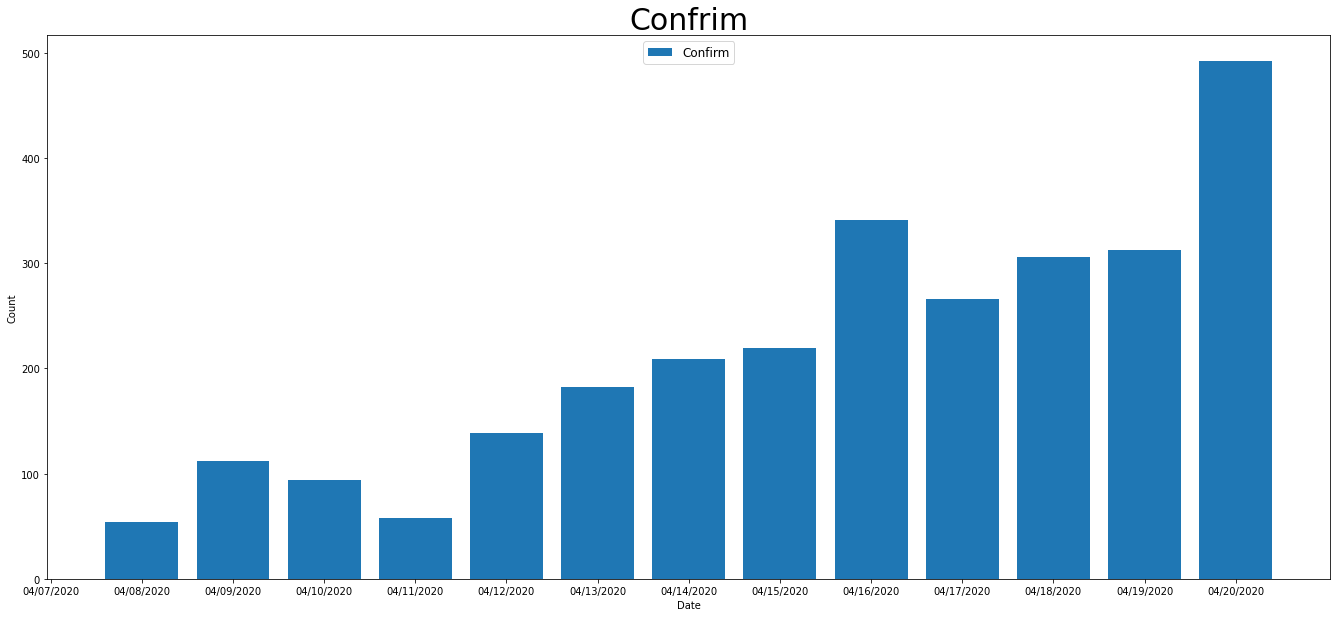

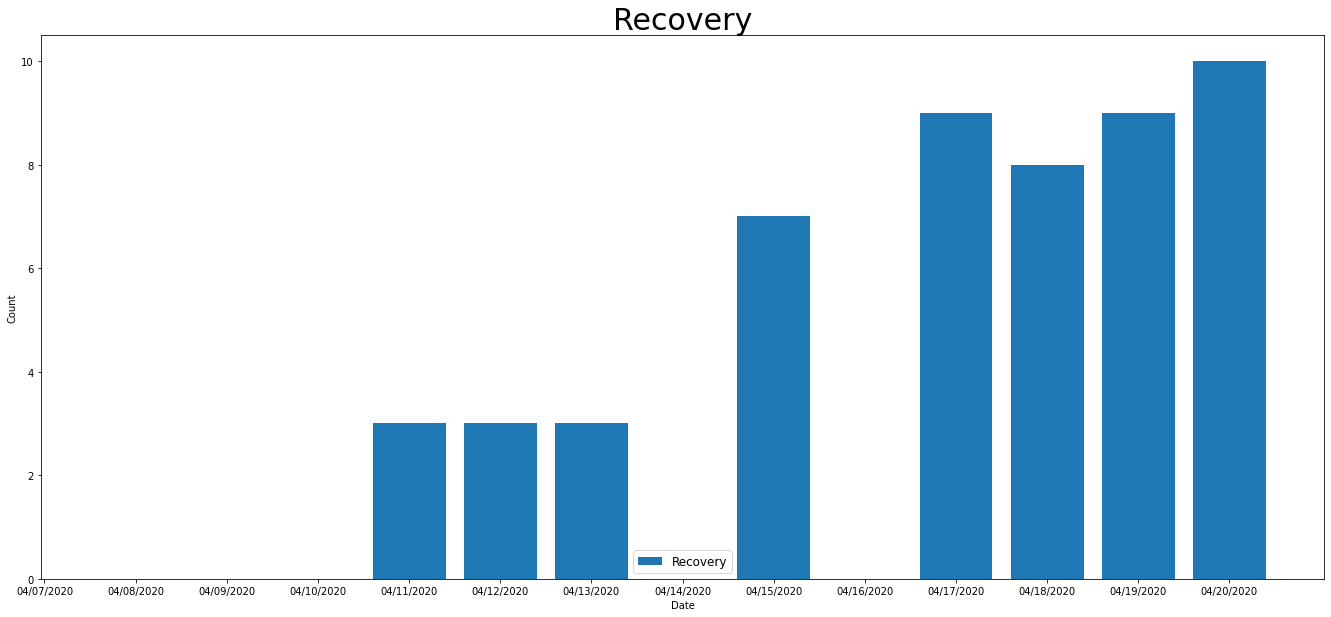

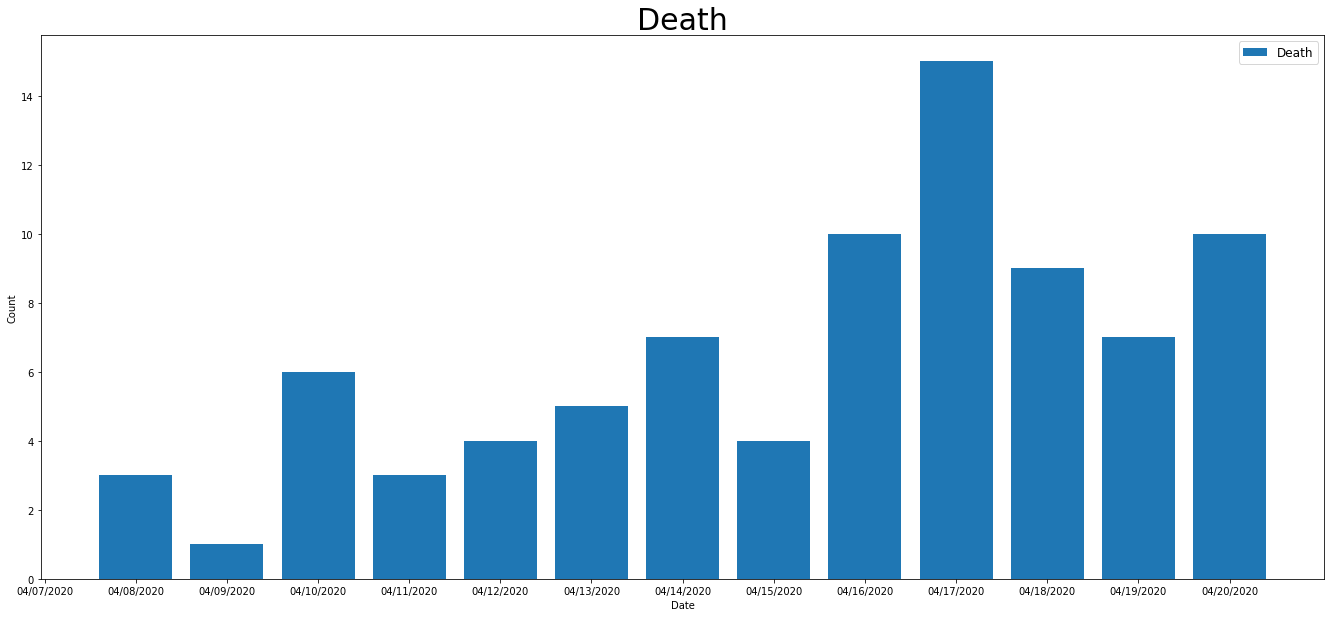

In [29]:
plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Confirmed_new,label="Confirm")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confrim',fontsize=30)
plt.show()


plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Recovered_new,label="Recovery")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovery',fontsize=30)
plt.show()

plt.figure(figsize=(23,10))

plt.bar(time.ObservationDate, time.Deaths_new,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Death',fontsize=30)
plt.show()



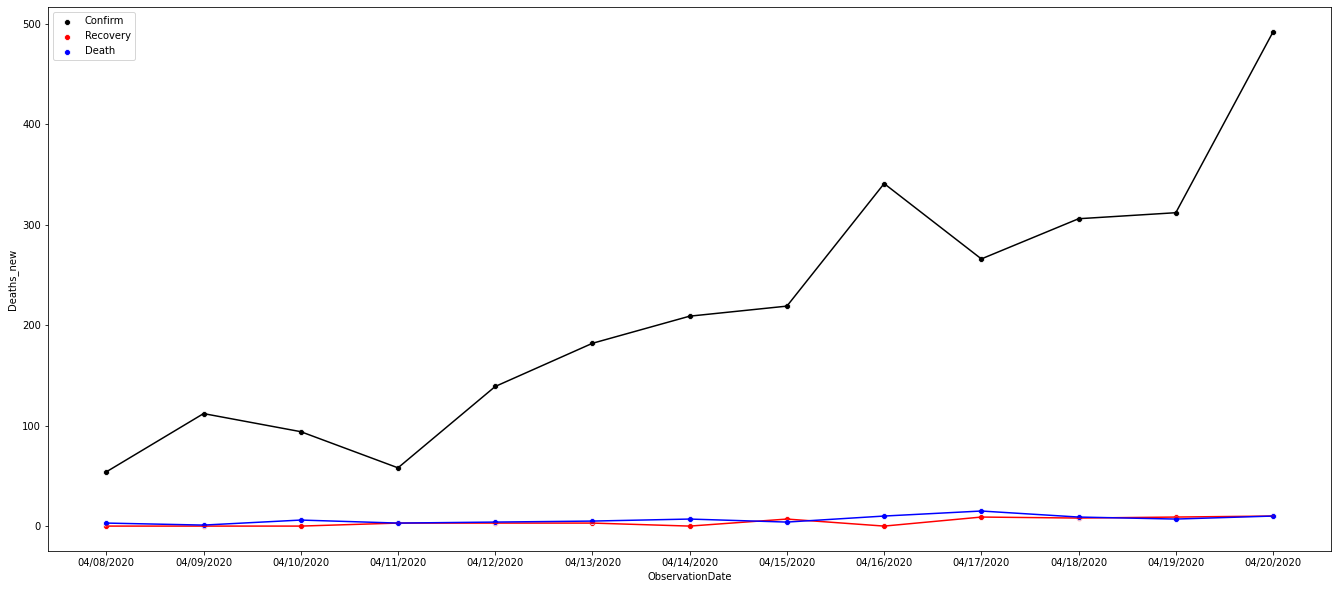

In [30]:
f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="ObservationDate", y="Confirmed_new", data=time,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="ObservationDate", y="Recovered_new", data=time,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="ObservationDate", y="Deaths_new", data=time,
             color="blue",label = "Death")
plt.plot(time.ObservationDate,time.Confirmed_new,zorder=1,color="black")
plt.plot(time.ObservationDate,time.Recovered_new,zorder=1,color="red")
plt.plot(time.ObservationDate,time.Deaths_new,zorder=1,color="blue")

In [31]:
global_data = time

# **Growth Rate and Ratio**

In [32]:
# This functions smooths data, thanks to Dan Pearson. We will use it to smooth the data for growth factor.
def smoother(inputdata,w,imax):
    data = 1.0*inputdata
    data = data.replace(np.nan,1)
    data = data.replace(np.inf,1)
    #print(data)
    smoothed = 1.0*data
    normalization = 1
    for i in range(-imax,imax+1):
        if i==0:
            continue
        smoothed += (w**abs(i))*data.shift(i,axis=0)
        normalization += w**abs(i)
    smoothed /= normalization
    return smoothed

def growth_factor(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    confirmed_iminus2 = confirmed.shift(2, axis=0)
    return (confirmed-confirmed_iminus1)/(confirmed_iminus1-confirmed_iminus2)

def growth_ratio(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    return (confirmed/confirmed_iminus1)

# This is a function which plots (for in input country) the active, confirmed, and recovered cases, deaths, and the growth factor.
def plot_country_active_confirmed_recovered(country):
    
    # Plots Active, Confirmed, and Recovered Cases. Also plots deaths.
    country_data = global_data[global_data['Country/Region']==country]
    table = country_data.drop(['SNo','Province/State', 'Last Update'], axis=1)
    print(table)
    table['ActiveCases'] = table['Confirmed'] - table['Recovered'] - table['Deaths']
    table2 = pd.pivot_table(table, values=['ActiveCases','Confirmed', 'Recovered','Deaths'], index=['ObservationDate'], aggfunc=np.sum)
    table3 = table2.drop(['Deaths'], axis=1)
   
    # Growth Factor
    w = 0.5
    table2['GrowthFactor'] = growth_factor(table2['Confirmed'])
    table2['GrowthFactor'] = smoother(table2['GrowthFactor'],w,5)

    # 2nd Derivative
    table2['2nd_Derivative'] = np.gradient(np.gradient(table2['Confirmed'])) #2nd derivative
    table2['2nd_Derivative'] = smoother(table2['2nd_Derivative'],w,7)


    #Plot confirmed[i]/confirmed[i-1], this is called the growth ratio
    table2['GrowthRatio'] = growth_ratio(table2['Confirmed'])
    table2['GrowthRatio'] = smoother(table2['GrowthRatio'],w,5)
    
    #Plot the growth rate, we will define this as k in the logistic function presented at the beginning of this notebook.
    table2['GrowthRate']=np.gradient(np.log(table2['Confirmed']))
    table2['GrowthRate'] = smoother(table2['GrowthRate'],0.5,3)
    
    # horizontal line at growth rate 1.0 for reference
    x_coordinates = [1, 100]
    y_coordinates = [1, 1]
    f, ax = plt.subplots(figsize=(15,5))
    table2['Deaths'].plot(title='Deaths')
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthFactor'].plot(title='Growth Factor')
    plt.plot(x_coordinates, y_coordinates) 
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['2nd_Derivative'].plot(title='2nd_Derivative')
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthRatio'].plot(title='Growth Ratio')
    plt.plot(x_coordinates, y_coordinates)
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthRate'].plot(title='Growth Rate')
    plt.show()

    return 

      ObservationDate Country/Region  Confirmed  Deaths  Recovered  \
12579      04/07/2020     Bangladesh      164.0    17.0       33.0   
12899      04/08/2020     Bangladesh      218.0    20.0       33.0   
13219      04/09/2020     Bangladesh      330.0    21.0       33.0   
13539      04/10/2020     Bangladesh      424.0    27.0       33.0   
13860      04/11/2020     Bangladesh      482.0    30.0       36.0   
14181      04/12/2020     Bangladesh      621.0    34.0       39.0   
14501      04/13/2020     Bangladesh      803.0    39.0       42.0   
14821      04/14/2020     Bangladesh     1012.0    46.0       42.0   
15141      04/15/2020     Bangladesh     1231.0    50.0       49.0   
15461      04/16/2020     Bangladesh     1572.0    60.0       49.0   
15781      04/17/2020     Bangladesh     1838.0    75.0       58.0   
16101      04/18/2020     Bangladesh     2144.0    84.0       66.0   
16421      04/19/2020     Bangladesh     2456.0    91.0       75.0   
16741      04/20/202

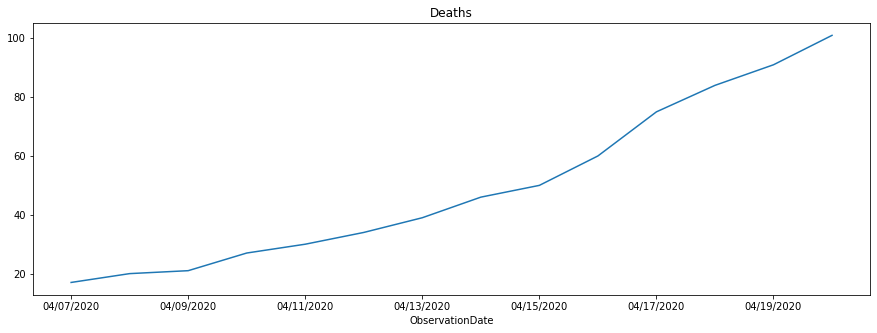

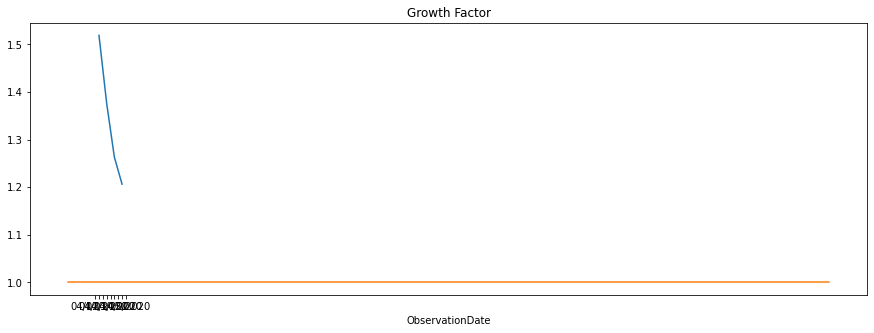

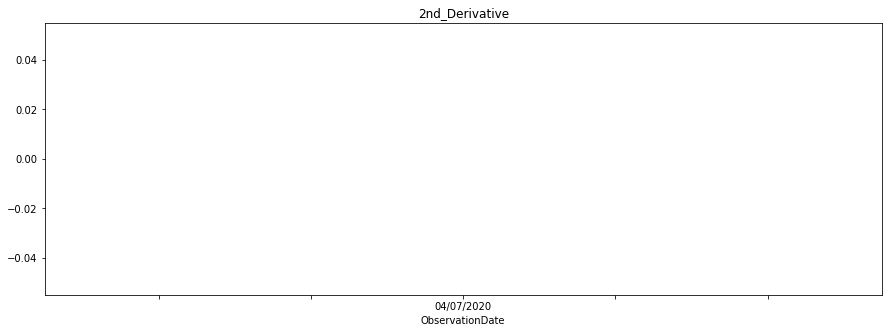

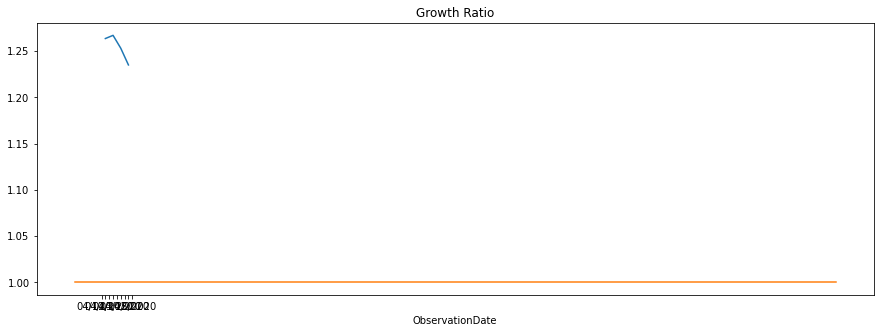

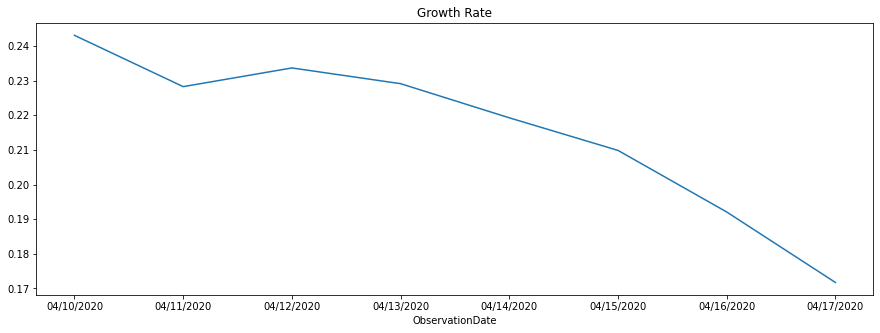

In [33]:
# plot_country_active_confirmed_recovered('South Korea')
plot_country_active_confirmed_recovered('Bangladesh')


# **Current State of Patient**

In [34]:
infected_patient = patient.shape[0]
print(infected_patient)
rp = patient.loc[patient["state"] == "released"].shape[0]
print(rp)
dp = patient.loc[patient["state"] == "deceased"].shape[0]
print(dp)
ip = patient.loc[patient["state"]== "isolated"].shape[0]
print(ip)
rp=rp/patient.shape[0]
dp=dp/patient.shape[0]
ip=ip/patient.shape[0]
print("The percentage of recovery is "+ str(rp*100) )
print("The percentage of deceased is "+ str(dp*100) )
print("The percentage of isolated is "+ str(ip*100) )


5328
35
20
5273
The percentage of recovery is 0.6569069069069069
The percentage of deceased is 0.37537537537537535
The percentage of isolated is 98.96771771771772


In [35]:
states = pd.DataFrame(patient["state"].value_counts())
print(states)
states["status"] = states.index
print(states)
states.rename(columns={"state": "count"}, inplace=True)

fig = px.pie(states,
             values="count",
             names="status",
             title="Current state of patients",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.show()

          state
isolated   5273
released     35
deceased     20
          state    status
isolated   5273  isolated
released     35  released
deceased     20  deceased


**People who released**

In [36]:
released = df_patient[df_patient.state == 'released']
released.head()

id     sex  birth_year country               region group infection_reason  \
0   1  female      1984.0   China  filtered at airport   NaN   visit to Wuhan   
1   2    male      1964.0   Korea  filtered at airport   NaN   visit to Wuhan   
2   3    male      1966.0   Korea         capital area   NaN   visit to Wuhan   
3   4    male      1964.0   Korea         capital area   NaN   visit to Wuhan   
4   5    male      1987.0   Korea         capital area   NaN   visit to Wuhan   

   infection_order  infected_by  contact_number  ... released_date  \
0              1.0          NaN            45.0  ...    2020-02-06   
1              1.0          NaN            75.0  ...    2020-02-05   
2              1.0          NaN            16.0  ...    2020-02-12   
3              1.0          NaN            95.0  ...    2020-02-09   
4              1.0          NaN            31.0  ...    2020-03-02   

  deceased_date     state   age  age_range time_to_release_since_confirmed  \
0           NaT  released  36.0      30-39                         17 days   
1           NaT  released  56.0      50-59                         12 days   
2           NaT  released  54.0      50-59                         17 days   
3           NaT  released  56.0      50-59                         13 days   
4           NaT  released  33.0      30-39                         32 days   

  time_to_death_since_confirmed duration_since_confirmed duration_days  \
0                           NaT                  17 days          17.0   
1                           NaT                  12 days          12.0   
2                           NaT                  17 days          17.0   
3                           NaT                  13 days          13.0   
4                           NaT                  32 days          32.0   

   state_by_gender  
0  released_female  
1    released_male  
2    released_male  
3    released_male  
4    released_male  

[5 rows x 21 columns]

**People who are in isolated state**

In [37]:
isolated_state = df_patient[df_patient.state == 'isolated']
isolated_state.head()

id     sex  birth_year country        region group      infection_reason  \
24  25  female      1946.0   Korea  capital area   NaN  contact with patient   
25  26    male      1968.0   Korea  capital area   NaN  contact with patient   
26  27  female      1982.0   China  capital area   NaN        visit to China   
28  29    male      1938.0   Korea  capital area   NaN  contact with patient   
29  30  female      1952.0   Korea  capital area   NaN  contact with patient   

    infection_order  infected_by  contact_number  ... released_date  \
24              2.0         27.0            12.0  ...           NaT   
25              1.0         27.0             0.0  ...           NaT   
26              1.0          NaN            40.0  ...           NaT   
28              4.0         83.0           117.0  ...           NaT   
29              5.0         29.0            27.0  ...           NaT   

   deceased_date     state   age  age_range time_to_release_since_confirmed  \
24           NaT  isolated  74.0      70-79                             NaT   
25           NaT  isolated  52.0      50-59                             NaT   
26           NaT  isolated  38.0      30-39                             NaT   
28           NaT  isolated  82.0      80-89                             NaT   
29           NaT  isolated  68.0      60-69                             NaT   

   time_to_death_since_confirmed duration_since_confirmed duration_days  \
24                           NaT                      NaT           NaN   
25                           NaT                      NaT           NaN   
26                           NaT                      NaT           NaN   
28                           NaT                      NaT           NaN   
29                           NaT                      NaT           NaN   

    state_by_gender  
24  isolated_female  
25    isolated_male  
26  isolated_female  
28    isolated_male  
29  isolated_female  

[5 rows x 21 columns]

**Patient who died**

In [38]:
dead = df_patient[df_patient.state == 'deceased']
dead.head()

id     sex  birth_year country            region  \
37    38  female      1963.0   Korea             Daegu   
53    54    male      1963.0   Korea  Gyeongsangbuk-do   
54    55    male      1961.0   Korea  Gyeongsangbuk-do   
102  103    male      1957.0   Korea  Gyeongsangbuk-do   
106  107    male      1953.0   Korea  Gyeongsangbuk-do   

                        group infection_reason  infection_order  infected_by  \
37                        NaN              NaN              NaN          NaN   
53   Cheongdo Daenam Hospital              NaN              NaN          NaN   
54   Cheongdo Daenam Hospital              NaN              NaN          NaN   
102  Cheongdo Daenam Hospital              NaN              NaN          NaN   
106  Cheongdo Daenam Hospital              NaN              NaN          NaN   

     contact_number  ... released_date deceased_date     state   age  \
37              NaN  ...           NaT    2020-02-23  deceased  57.0   
53              NaN  ...           NaT    2020-02-23  deceased  57.0   
54              NaN  ...           NaT    2020-02-23  deceased  59.0   
102             NaN  ...           NaT    2020-02-19  deceased  63.0   
106             NaN  ...           NaT    2020-02-24  deceased  67.0   

     age_range time_to_release_since_confirmed time_to_death_since_confirmed  \
37       50-59                             NaT                        5 days   
53       50-59                             NaT                        4 days   
54       50-59                             NaT                        4 days   
102      60-69                             NaT                       -1 days   
106      60-69                             NaT                        3 days   

    duration_since_confirmed duration_days  state_by_gender  
37                    5 days           5.0  deceased_female  
53                    4 days           4.0    deceased_male  
54                    4 days           4.0    deceased_male  
102                  -1 days          -1.0    deceased_male  
106                   3 days           3.0    deceased_male  

[5 rows x 21 columns]

# **Age distribution of the released**

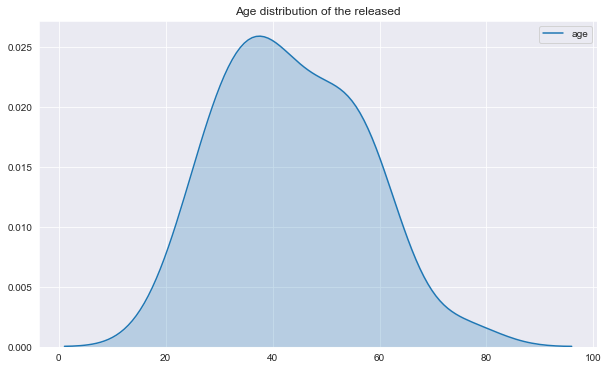

In [39]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the released")
sns.kdeplot(data=released['age'], shade=True)

In [40]:
agr = released[released.age_range!="Unknown"]
fig = px.pie(agr,
             names="age_range",
             title="Age of released person",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# **Age distribution of isolated person**

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning:

invalid value encountered in greater

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning:

invalid value encountered in less



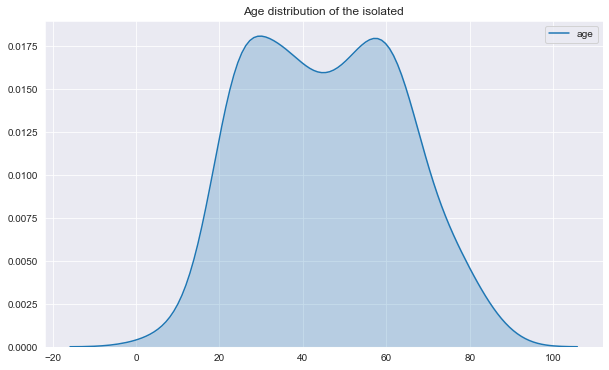

In [41]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the isolated")
sns.kdeplot(data=isolated_state['age'], shade=True)

In [42]:
agi = isolated_state[isolated_state.age_range!="Unknown"]
fig = px.pie(agi,
             names="age_range",
             title="Age of isolated person",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# **Age distribution of death**

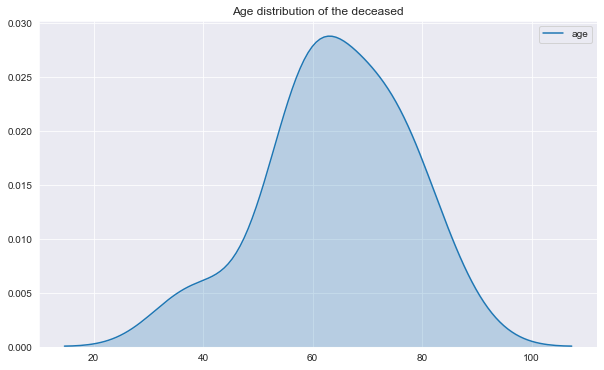

In [43]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased")
sns.kdeplot(data=dead['age'], shade=True)

In [44]:
agd = dead[dead.age_range!="Unknown"]
fig = px.pie(agd,
             names="age_range",
             title="Age of Dead person",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

                                      ** Age distribution of deceased **
 Here, the graph shows the age distribution of the deceased by gender. We can clearly see older people are more likely to be infected, especially older people with underlying lung disease and having problems in their respiration. The age group of 60 to 70 yr are more infected than the rest of the population. As  Dr. Steven Gambert, professor of medicine and director of geriatrics at the University of Maryland School of Medicine says “ Older people have  higher risk of underlying health conditions, older people are already under physical stress, and their immune systems, even if not significantly compromised, simply do not have the same “ability to fight viruses and bacteria”

In [45]:
male_dead = dead[dead.sex=='male']
female_dead = dead[dead.sex=='female']

# **Age distribution of death by gender**

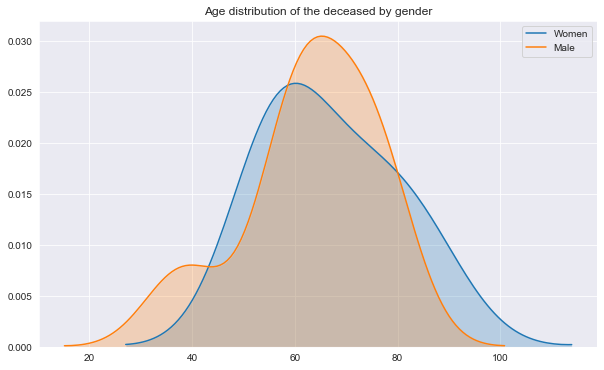

In [46]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased by gender")
sns.kdeplot(data=female_dead['age'], label="Women", shade=True)
sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True)

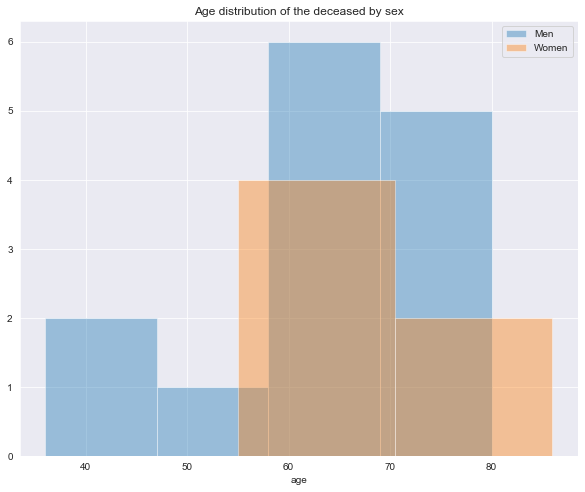

In [47]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.distplot(a=male_dead['age'], label="Men", kde=False)
sns.distplot(a=female_dead['age'], label="Women", kde=False)
plt.title("Age distribution of the deceased by sex")
plt.legend()

                                    **Gender distribution of deceased **
The graph shows the age distribution of deceased gender where men are more likely to die from coronavirus  than women. New research  has found that men, particularly middle-aged and older men, are having a harder time fighting off the virus than women. Chinese researchers found that while the infection rate among men and women is the same, the death rate among men is 2.8% compared with 1.7% for women. As there are a few reasons men are more likely to die from the new coronavirus. Women have a heightened immune response. During Middle East respiratory syndrome coronavirus 32% of men died of the infection compared with 25.8% of women. 

**Comparison of released and deceased by age**

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning:

invalid value encountered in greater

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning:

invalid value encountered in less



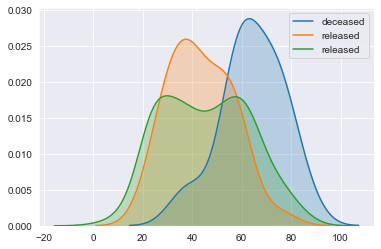

In [48]:
sns.kdeplot(data=dead['age'],label='deceased', shade=True)
sns.kdeplot(data=released['age'],label='released', shade=True)
sns.kdeplot(data=isolated_state['age'],label='released', shade=True)

# **Death by gender**

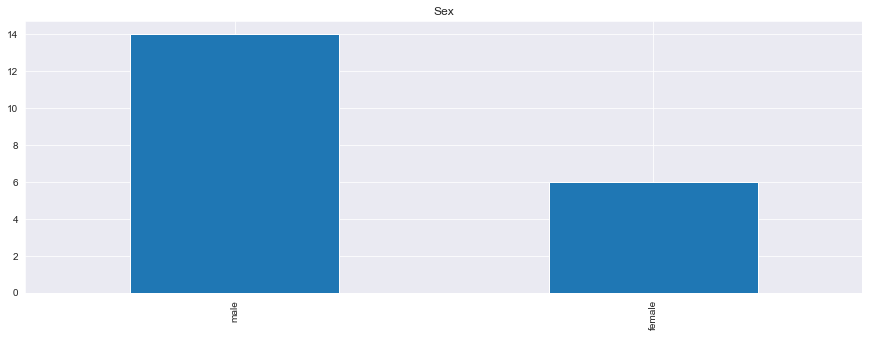

In [49]:
plt.figure(figsize=(15, 5))
plt.title('Sex')
dead.sex.value_counts().plot.bar();

In [50]:
fig = px.pie( values=dead.groupby(['sex']).size().values,names=dead.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

# **Isolation by gender**

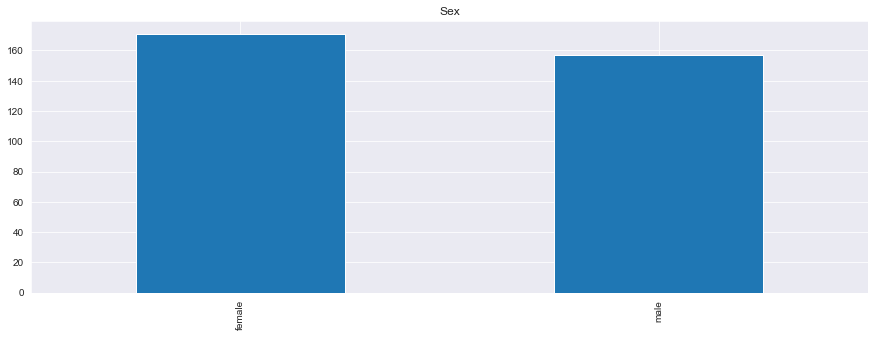

In [51]:
plt.figure(figsize=(15, 5))
plt.title('Sex')
isolated_state.sex.value_counts().plot.bar();

In [52]:
fig = px.pie( values=isolated_state.groupby(['sex']).size().values,names=isolated_state.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

# **Recovery by gender**

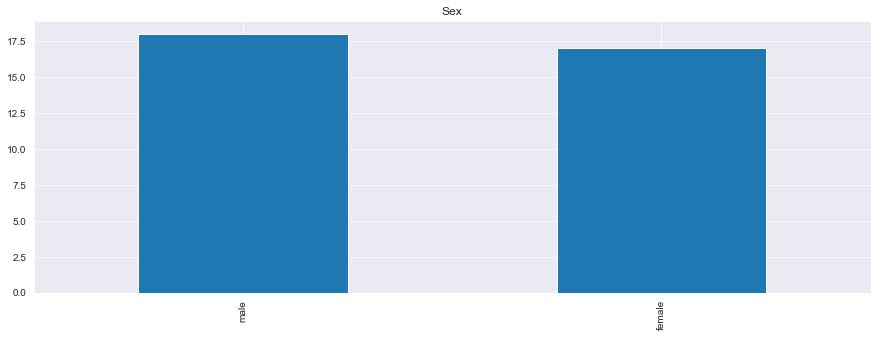

In [53]:
plt.figure(figsize=(15, 5))
plt.title('Sex')
released.sex.value_counts().plot.bar();

In [54]:
fig = px.pie( values=released.groupby(['sex']).size().values,names=released.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

# **Reason for the infection**

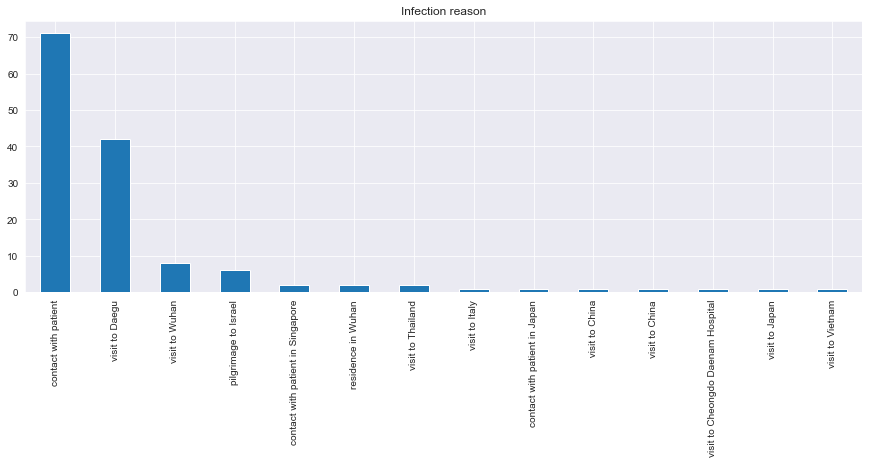

In [55]:
plt.figure(figsize=(15,5))
plt.title('Infection reason')
df_patient.infection_reason.value_counts().plot.bar();

In [56]:
fig = px.pie( values=df_patient.groupby(['infection_reason']).size().values,names=df_patient.groupby(['infection_reason']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

In [57]:
inf_rsn =  df_patient['infection_reason']
inf_rsn  = inf_rsn.dropna()

<Figure size 720x432 with 0 Axes>

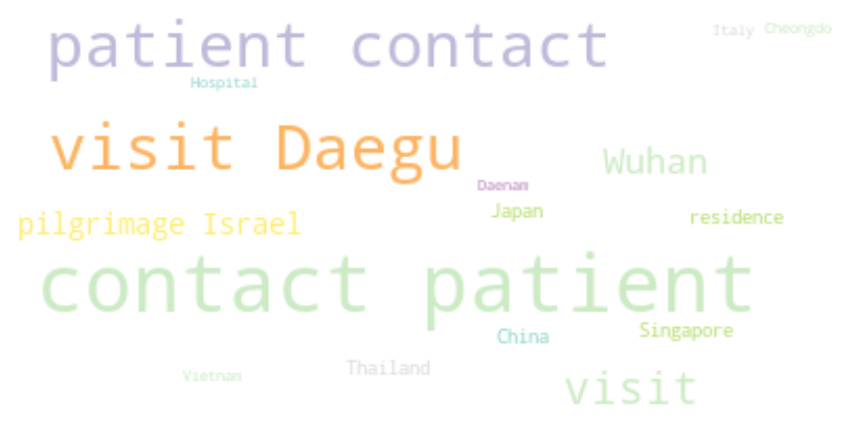

In [58]:

from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in inf_rsn)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

**There are many effective reasons for the coronavirus infection. There is no specific antiviral treatment recommended for COVID-19. People with COVID-19 should receive supportive care to help relieve symptoms. For severe cases, treatment should include care to support vital organ functions.People who think they may have been exposed to COVID-19 should contact their healthcare provider immediately.  According to the dataset the major reason for the infection is being in contact with patients. There are so many different reasons for the cause of infection which are visits to countries and regions like daegu, wuhan, thailand, china, vietnam, italy.**

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



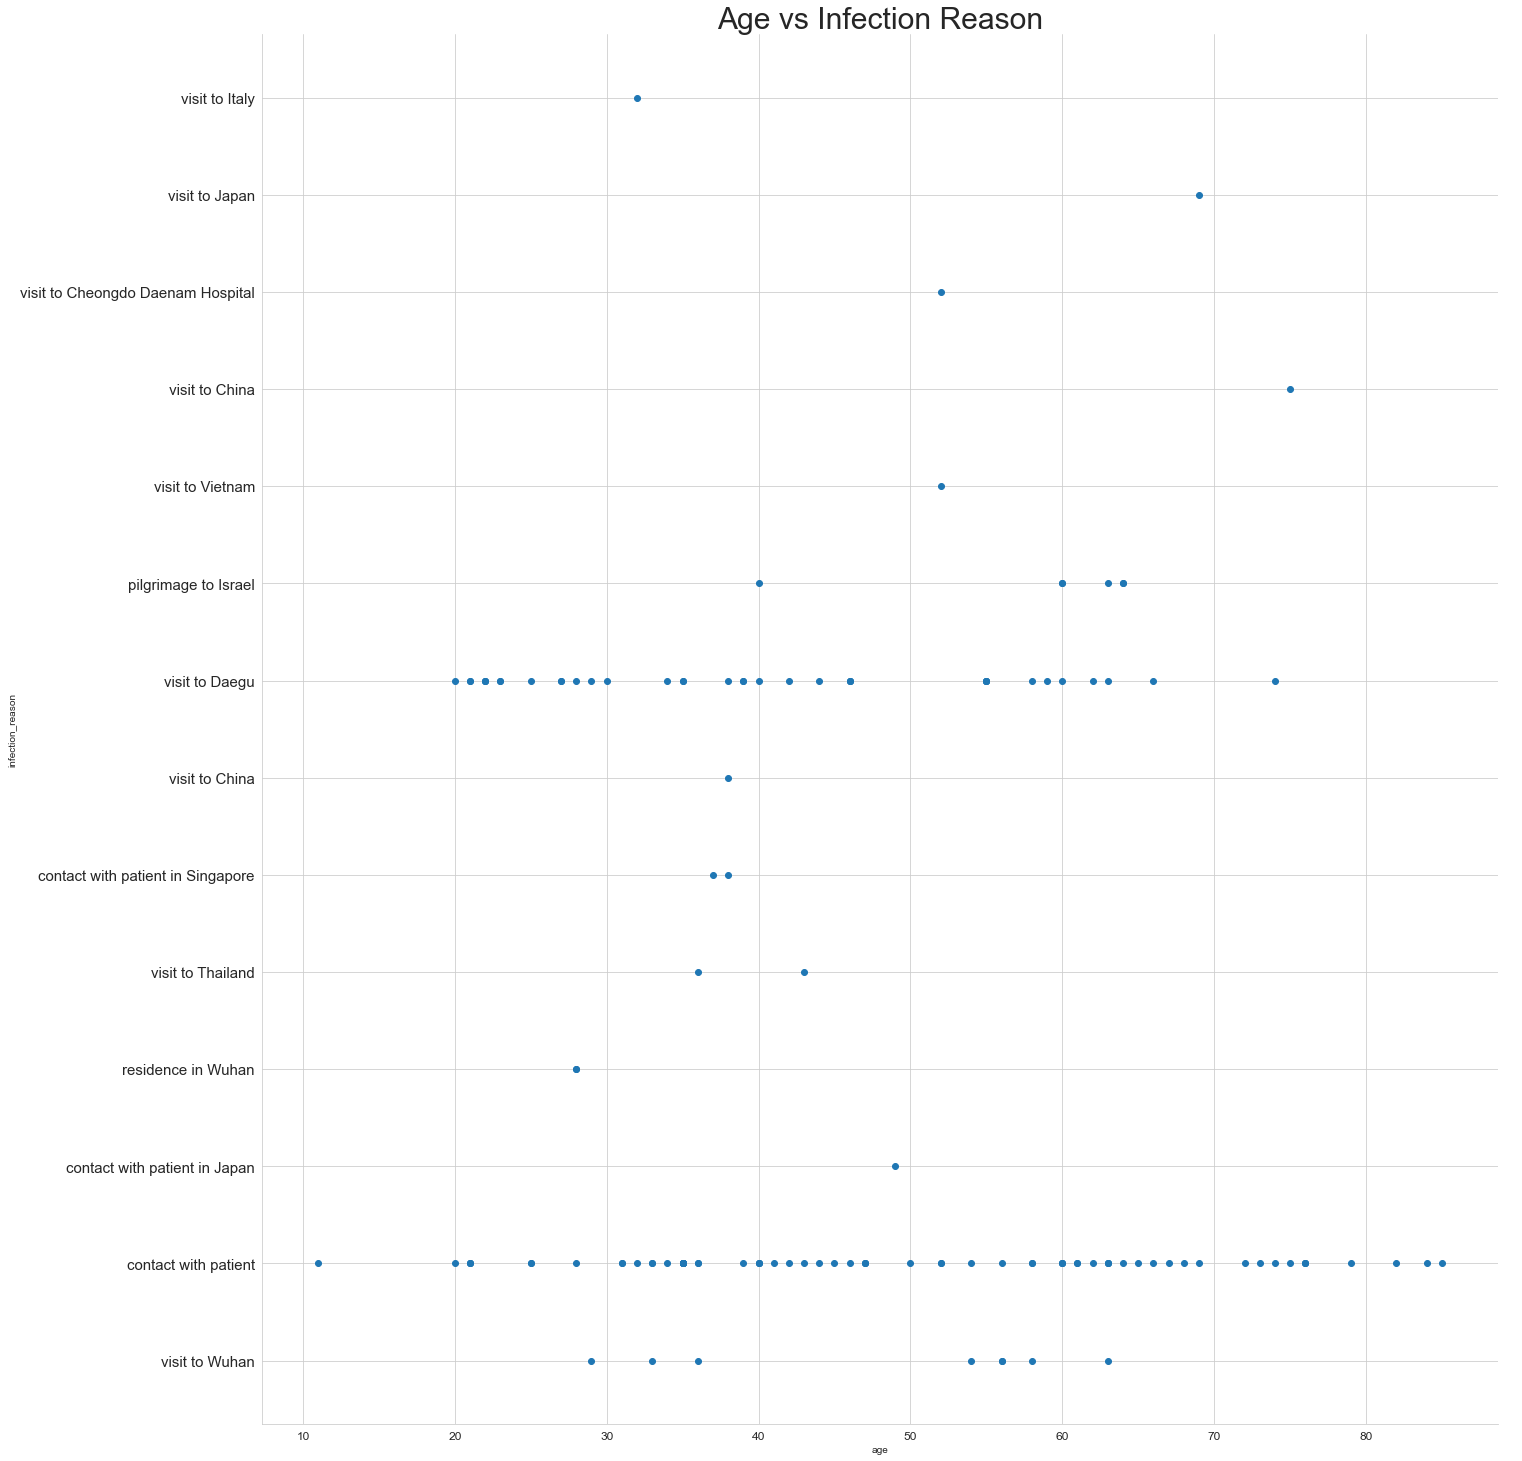

In [59]:
sns.set_style("whitegrid")
sns.FacetGrid(df_patient,  size = 20)\
.map(plt.scatter, 'age', 'infection_reason')\
.add_legend()
plt.title('Age vs Infection Reason',fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.show()

# **State of Patient**

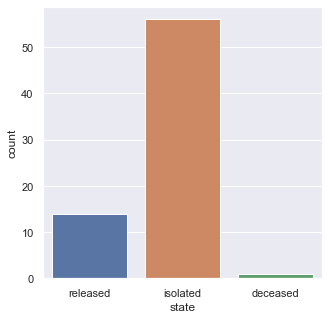

In [60]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_patient['state'].loc[
    (df_patient['infection_reason']=='contact with patient')
])

In [61]:
fig = px.pie( values=df_patient.groupby(['state']).size().values,names=df_patient.groupby(['state']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

**State of male patient**

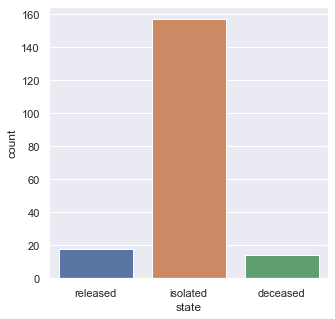

In [62]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_patient['state'].loc[(df_patient['sex']=="male")])

**State of female patient**

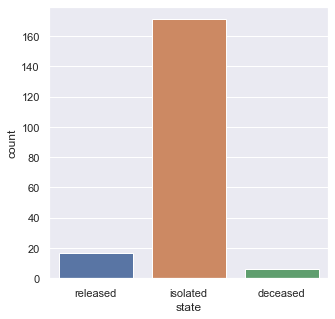

In [63]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_patient['state'].loc[(df_patient['sex']=="female")])

The first case of coronavirus in the country on January 20. At the moment, 31 patients were discharged from hospitals after making a full recovery from the virus and 22 deaths are reported. In total, over 105 thousand people have been tested until now. 

# **State of patient(male and female) vs age **

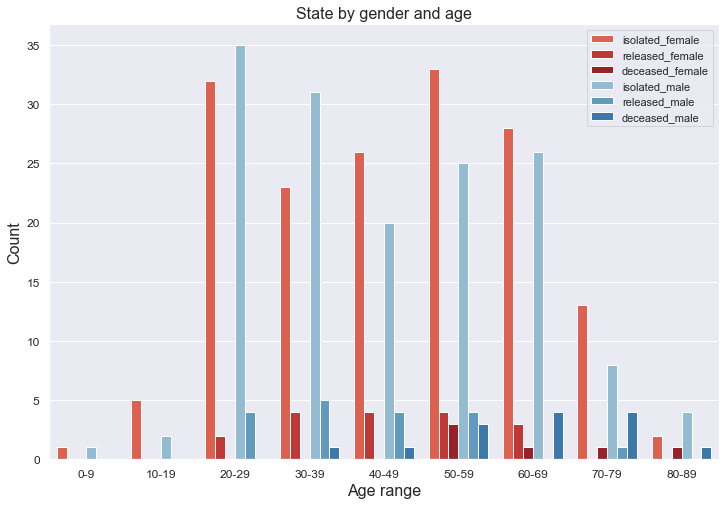

In [64]:
age_gender_hue_order =["isolated_female", "released_female", "deceased_female",
                       "isolated_male", "released_male", "deceased_male"]
custom_palette = sns.color_palette("Reds")[3:6] + sns.color_palette("Blues")[2:5]

plt.figure(figsize=(12, 8))
sns.countplot(x = "age_range",
              hue="state_by_gender",
              order=age_ranges,
              hue_order=age_gender_hue_order,
              palette=custom_palette,
              data=patient)
plt.title("State by gender and age", fontsize=16)
plt.xlabel("Age range", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right")
plt.show()

# **Region by age and state**

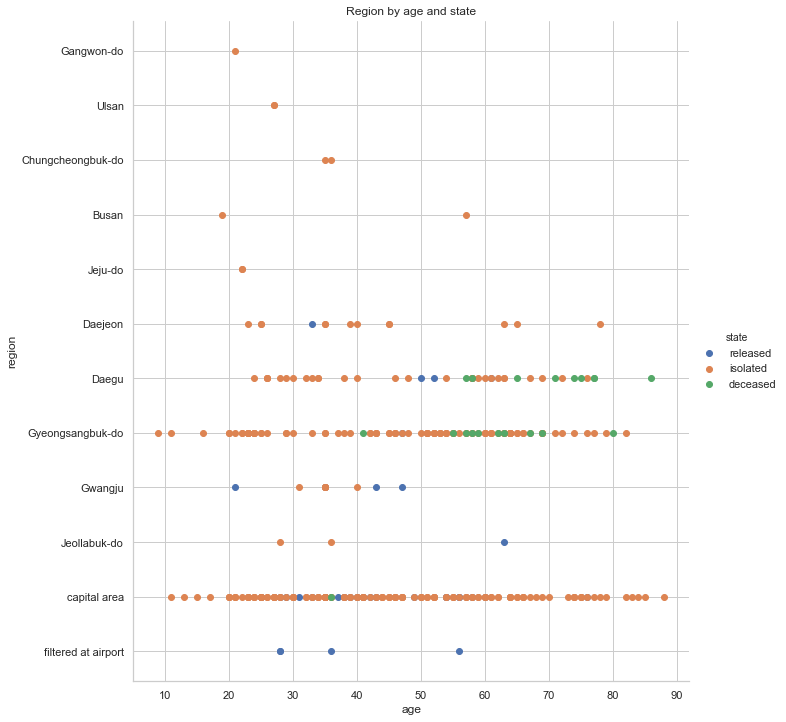

In [65]:
sns.set_style("whitegrid")
sns.FacetGrid(df_patient, hue = 'state', size = 10)\
.map(plt.scatter, 'age', 'region')\
.add_legend()
plt.title('Region by age and state')
plt.show()

# **Looking route data**

In [66]:
df_route.head()

id        date     province      city              visit   latitude  \
0   1  2020-01-19      Incheon   Jung-gu            airport  37.460459   
1   1  2020-01-20      Incheon    Seo-gu  hospital_isolated  37.478832   
2   2  2020-01-22  Gyeonggi-do  Gimpo-si            airport  37.562143   
3   2  2020-01-23        Seoul   Jung-gu  hospital_isolated  37.567454   
4   3  2020-01-20      Incheon   Jung-gu            airport  37.460459   

    longitude  
0  126.440680  
1  126.668558  
2  126.801884  
3  127.005627  
4  126.440680

**Checking if is there any null value**

In [67]:
df_route.isna().sum()

id           0
date         0
province     0
city         0
visit        0
latitude     0
longitude    0
dtype: int64

In [68]:
clus=df_route.loc[:,['id','latitude','longitude']]


**Checking for number of cluster**

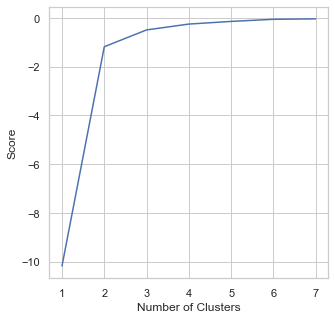

In [69]:
K_clusters = range(1,8)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_route[['latitude']]
X_axis = df_route[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()



As in this graph, after 3 score go to constant value, so we will go with 5 clusters

In [70]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(clus[clus.columns[1:3]])
clus['cluster_label'] = kmeans.fit_predict(clus[clus.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(clus[clus.columns[1:3]])

**Graphical representation of clusters**

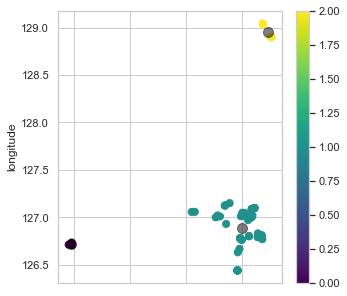

In [71]:
clus.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

**We will verify our clusters by putting values in world map by making use of folium library**

# **Affected place in world map**

In [72]:

 import folium
southkorea_map = folium.Map(location=[36.55,126.983333 ], zoom_start=7,tiles='Stamen Toner')

for lat, lon,city in zip(df_route['latitude'], df_route['longitude'],df_route['city']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =('City: ' + str(city) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(southkorea_map)
southkorea_map

In [73]:
cmap1 = df_route
cmap1  = cmap1.groupby(['date', 'province','latitude','longitude'])['id'].max()


cmap1 = cmap1.reset_index()
cmap1.head()
cmap1['size'] = cmap1['id']*900
cmap1
fig = px.scatter_mapbox(cmap1, lat="latitude", lon="longitude",
                     color="id", size='size',
                     color_continuous_scale='burgyl',
                     animation_frame="date", 
                     title='Spread total cases over time')
fig.update(layout_coloraxis_showscale=True)
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3)
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


On the world map it can clearly be seen that the western side of the country is more affected. The number of cases from Daegu and Gyeongbuk accounts for almost 88 percent of the total infections. This is closely linked to a religious group called Shincheonji Church of Jesus based in Daegu, where a collective infection has occurred and is spreading throughout the country.  About 60 percent of all infections in South Korea were related to Shincheonji. There have also been several deaths from a hospital linked to this religious group. The government of South Korea announced that it will test all over 200 thousand members of the group for the coronavirus. Over 70 countries are restricting entry from South korea. South Korea has the most cases after China.  South Korea reported the first case on 19th of feb.The cases increased multifold on 21 February, the majority of them being reported in the city of Daegu. The increase was due to community spread, traced to a church in Shincheonji, alarming the Korean health authorities. Singapore too is facing a similar surge in community spread of the novel coronavirus. Seoul city mayor Park Won-soon demanded to prosecute some of the key leaders of the Shincheonji Church for hiding the identities of the suspects during contact tracing investigation.The alert level was further raised to Orange (Level 3) on 28 January. Furthermore, 29 national designated hospitals were announced to isolate the confirmed and suspected cases

# **Patient in city**

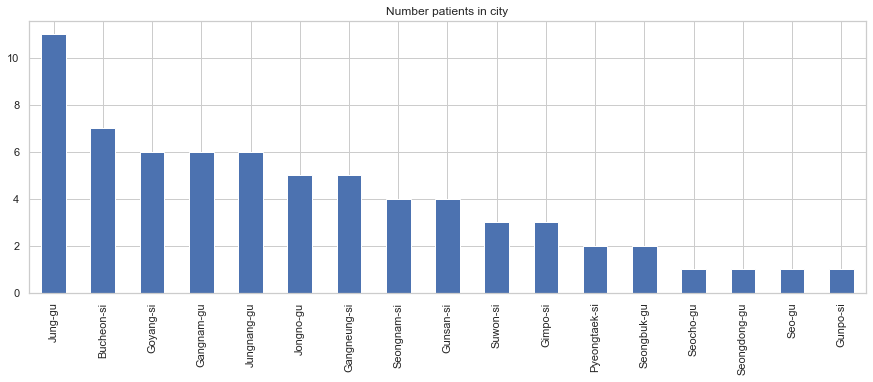

In [74]:
plt.figure(figsize=(15,5))
plt.title('Number patients in city')
df_route.city.value_counts().plot.bar();

In [75]:
fig = px.pie( values=df_route.groupby(['city']).size().values,names=df_route.groupby(['city']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

<Figure size 720x432 with 0 Axes>

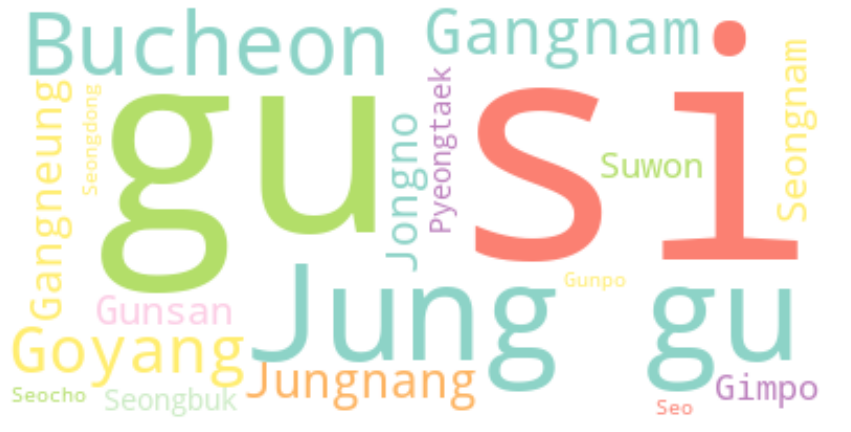

In [76]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df_route.city)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

# **Patients in Provience/State**

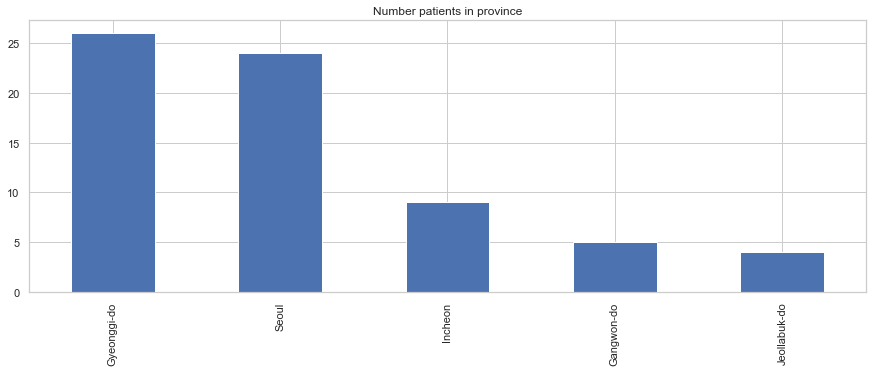

In [77]:
plt.figure(figsize=(15,5))
plt.title('Number patients in province')
df_route.province.value_counts().plot.bar();

In [78]:
fig = px.pie( values=df_route.groupby(['province']).size().values,names=df_route.groupby(['province']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

<Figure size 720x432 with 0 Axes>

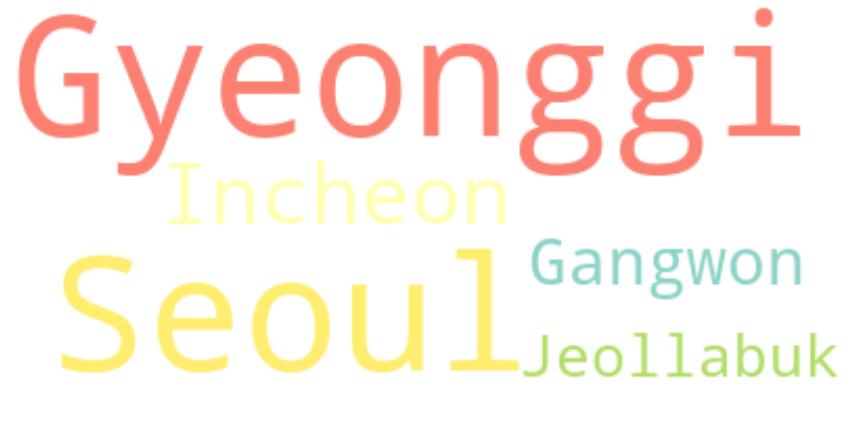

In [79]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df_route.province)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

**73.5% cases of Coronavirus cases are of state Gyeongii-do and Seoul**

**Places where people get affected**

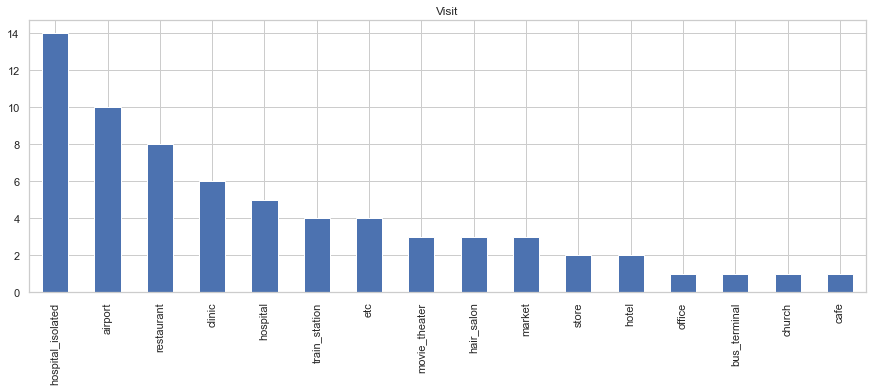

In [80]:
plt.figure(figsize=(15,5))
plt.title('Visit')
df_route.visit.value_counts().plot.bar();


In [81]:
fig = px.pie( values=df_route.groupby(['visit']).size().values,names=df_route.groupby(['visit']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

<Figure size 720x432 with 0 Axes>

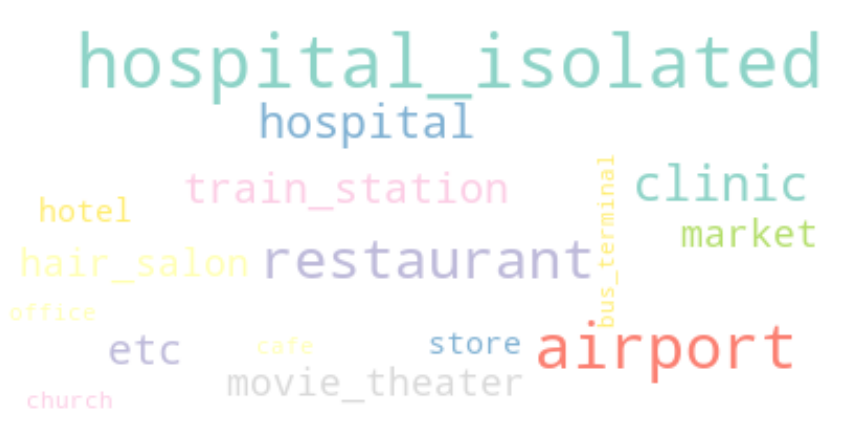

In [82]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df_route.visit)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

# **Time from confirmation to release or death**

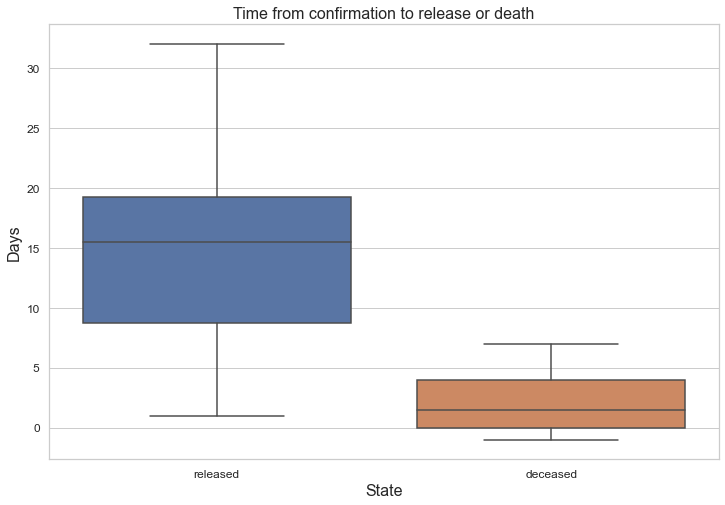

In [83]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="state",
            y="duration_days",
            order=["released", "deceased"],
            data=patient)
plt.title("Time from confirmation to release or death", fontsize=16)
plt.xlabel("State", fontsize=16)
plt.ylabel("Days", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# **Time from confirmation to release or death by gender**

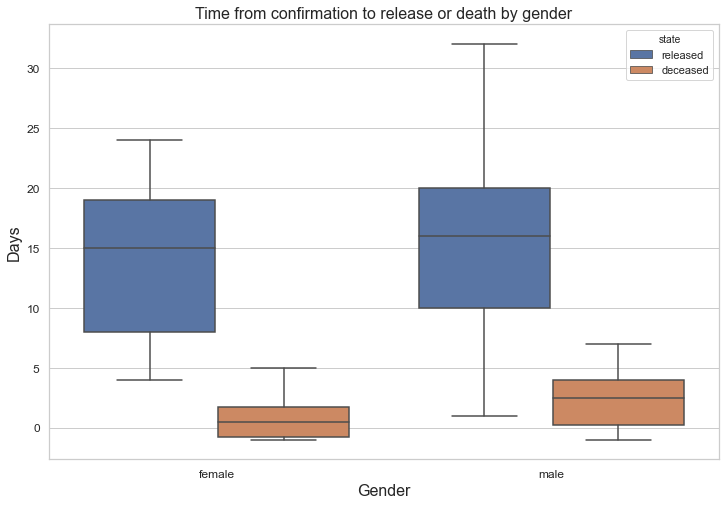

In [84]:
order_duration_sex = ["female", "male"]
plt.figure(figsize=(12, 8))
sns.boxplot(x="sex",
            y="duration_days",
            order=order_duration_sex,
            hue="state",            
            hue_order=["released", "deceased"],
            data=patient)
plt.title("Time from confirmation to release or death by gender",
          fontsize=16)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Days", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# **Time from confirmation to release or death**

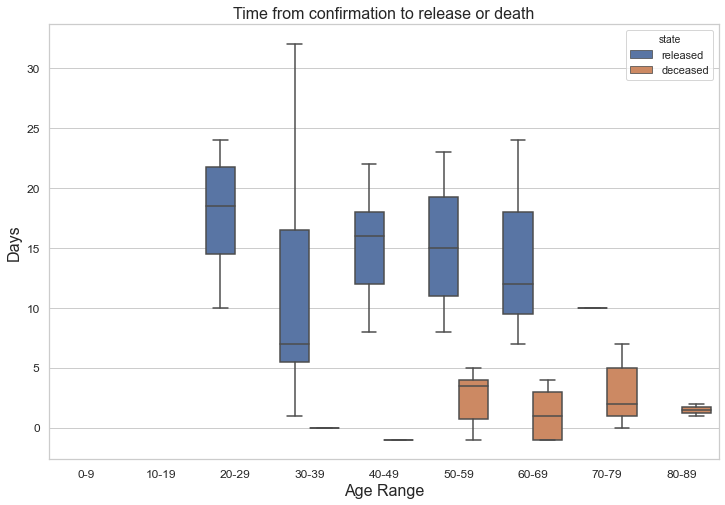

In [85]:
order_duration_age = sorted(patient["age_range"].unique())[:-1]
plt.figure(figsize=(12, 8))
sns.boxplot(x="age_range",
            y="duration_days",
            order=order_duration_age,
            hue="state",
            hue_order=["released", "deceased"],
            data=patient)
plt.title("Time from confirmation to release or death", fontsize=16)
plt.xlabel("Age Range", fontsize=16)
plt.ylabel("Days", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As the suspects of coronavirus are kept under observation. After the observation it has been found that the people who are released or who have great chances of recovery had sustained  10-20 days in hospitals. On the other hand the people who are deceased were found dead in 0-4 days.The deadly Coronavirus which has spread to more than 70 countries, is wreaking havoc globally, killing over 3,000 people and infecting almost 90,000 people since first detected in China in December last year. While Australia and the US reported their first deaths yesterday,

In [113]:
data = daily_count.resample('D').first().fillna(0).cumsum()
print(data)
data = data[20:]
# print(data.values)
x = np.arange(len(data)).reshape(-1, 1)
print(x)
y = data.values
print(y)

confirmed_date
2020-01-20       1.0
2020-01-21       1.0
2020-01-22       1.0
2020-01-23       1.0
2020-01-24       2.0
2020-01-25       2.0
2020-01-26       3.0
2020-01-27       4.0
2020-01-28       4.0
2020-01-29       4.0
2020-01-30       7.0
2020-01-31      11.0
2020-02-01      12.0
2020-02-02      15.0
2020-02-03      15.0
2020-02-04      16.0
2020-02-05      21.0
2020-02-06      24.0
2020-02-07      24.0
2020-02-08      24.0
2020-02-09      27.0
2020-02-10      28.0
2020-02-11      28.0
2020-02-12      28.0
2020-02-13      28.0
2020-02-14      28.0
2020-02-15      28.0
2020-02-16      30.0
2020-02-17      30.0
2020-02-18      39.0
2020-02-19      65.0
2020-02-20     104.0
2020-02-21     204.0
2020-02-22     433.0
2020-02-23     602.0
2020-02-24     833.0
2020-02-25     976.0
2020-02-26    1261.0
2020-02-27    1766.0
2020-02-28    2337.0
2020-02-29    3150.0
2020-03-01    4212.0
2020-03-02    4812.0
2020-03-03    5328.0
Freq: D, Name: id, dtype: float64
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 

# **Regression Model**

In [87]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)

In [112]:
test = np.arange(len(data)+7).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

**Graphical representatoin of current confirmed and predicted confirmed**

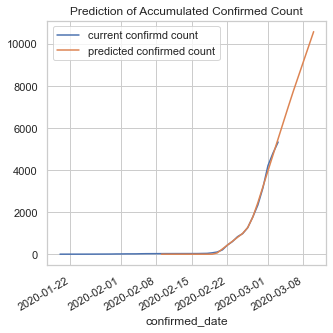

In [89]:
accumulated_count.plot()
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['current confirmd count', 'predicted confirmed count'])
plt.show()

# **Prophet**

In [90]:
prophet= pd.DataFrame(data)
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data.head()

ds     y
0 2020-02-09  27.0
1 2020-02-10  28.0
2 2020-02-11  28.0
3 2020-02-12  28.0
4 2020-02-13  28.0

**Prediction**

In [91]:
m=Prophet()
m.fit(pr_data)
future=m.make_future_dataframe(periods=15)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-02-09 -1155.825903 -1965.898399   243.696237 -1155.825903   
1  2020-02-10  -963.640137 -1762.338848   450.710430  -963.640137   
2  2020-02-11  -771.454371 -1450.171956   749.526058  -771.454371   
3  2020-02-12  -579.268606 -2000.270356   210.941044  -579.268606   
4  2020-02-13  -387.082840 -1860.657124   312.253678  -387.082840   
5  2020-02-14  -194.897074 -1653.333134   452.690529  -194.897074   
6  2020-02-15    -2.711308 -1178.040515   918.987389    -2.711308   
7  2020-02-16   189.474458  -607.166157  1630.436093   189.474458   
8  2020-02-17   381.660224  -341.172159  1856.565723   381.660224   
9  2020-02-18   573.845990  -195.343808  1991.591355   573.845990   
10 2020-02-19   766.031755  -624.165640  1461.839575   766.031755   
11 2020-02-20   958.220864  -373.292813  1680.633582   958.220864   
12 2020-02-21  1150.409973  -268.674834  1937.671311  1150.409973   
13 2020-02-22  1342.599082   107.307605  2337.066650  1342.599082   
14 2020-02-23  1534.789243   796.785488  2901.281280  1534.789243   
15 2020-02-24  1726.979403  1105.001312  3155.902120  1726.979403   
16 2020-02-25  1919.169564  1270.115073  3455.420016  1919.169564   
17 2020-02-26  2111.360876   729.904493  2853.568064  2111.360876   
18 2020-02-27  2303.552188   905.207329  3070.255394  2303.552188   
19 2020-02-28  2495.743500  1073.364265  3277.963415  2495.743500   
20 2020-02-29  2687.934812  1373.106759  3668.950667  2687.934812   
21 2020-03-01  2880.126124  2063.995104  4332.290250  2880.126124   
22 2020-03-02  3072.317436  2369.041426  4527.303399  3072.317436   
23 2020-03-03  3264.508748  2536.959817  4698.635884  3264.508748   
24 2020-03-04  3456.700060  2070.332266  4182.278216  3456.699904   
25 2020-03-05  3648.891372  2185.145330  4397.925833  3648.890771   
26 2020-03-06  3841.082684  2463.683350  4656.947308  3841.081531   
27 2020-03-07  4033.273996  2811.218356  4964.019067  4033.272161   
28 2020-03-08  4225.465308  3494.960010  5708.641888  4225.462655   
29 2020-03-09  4417.656620  3668.168960  5846.356009  4417.653040   
30 2020-03-10  4609.847932  3769.538845  6096.086540  4609.843322   
31 2020-03-11  4802.039244  3318.011256  5568.569376  4802.033429   
32 2020-03-12  4994.230557  3545.216489  5787.816587  4994.223630   
33 2020-03-13  5186.421869  3738.883859  5924.676603  5186.413810   
34 2020-03-14  5378.613181  4174.198870  6255.472273  5378.603588   
35 2020-03-15  5570.804493  4843.325755  6984.490632  5570.793679   
36 2020-03-16  5762.995805  5005.886837  7209.144520  5762.983667   
37 2020-03-17  5955.187117  5185.160462  7456.811365  5955.173683   
38 2020-03-18  6147.378429  4751.460596  6903.540735  6147.363600   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  -1155.825903      355.579119            355.579119            355.579119   
1   -963.640137      371.364637            371.364637            371.364637   
2   -771.454371      346.150900            346.150900            346.150900   
3   -579.268606     -314.629615           -314.629615           -314.629615   
4   -387.082840     -325.484037           -325.484037           -325.484037   
5   -194.897074     -294.042904           -294.042904           -294.042904   
6     -2.711308     -138.938101           -138.938101           -138.938101   
7    189.474458      355.579119            355.579119            355.579119   
8    381.660224      371.364637            371.364637            371.364637   
9    573.845990      346.150900            346.150900            346.150900   
10   766.031755     -314.629615           -314.629615           -314.629615   
11   958.220864     -325.484037           -325.484037           -325.484037   
12  1150.409973     -294.042904           -294.042904           -294.042904   
13  1342.599082     -138.938101           -138.938101           -138.938101   
14  1534.789243      355.579119            355.579119            

**Graphical Representation of Prediction**

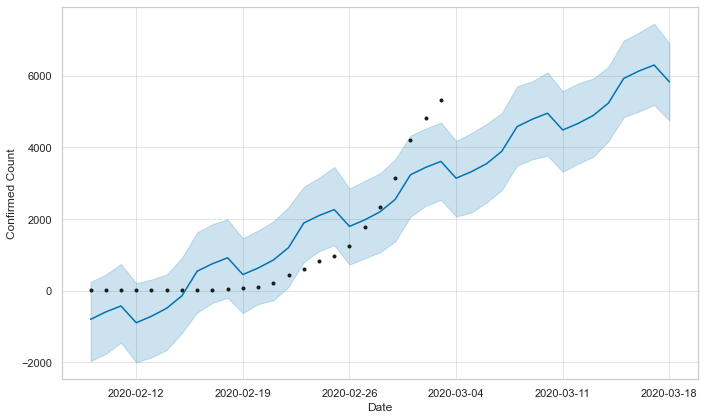

In [92]:
figure = plot_plotly(m, forecast)
py.iplot(figure) 

figure = m.plot(forecast,xlabel='Date',ylabel='Confirmed Count')


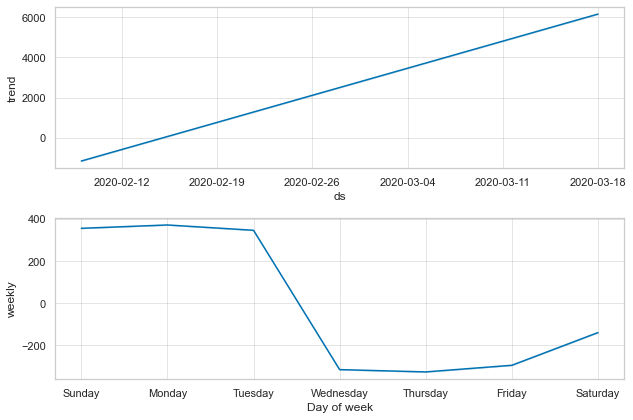

In [115]:
figure=m.plot_components(forecast)


**Autoregressive integrated moving average(Arima)**

In [114]:
confirm_cs = pd.DataFrame(data).cumsum()
arima_data = confirm_cs.reset_index()
arima_data.columns = ['confirmed_date','count']
arima_data.head()

confirmed_date  count
0     2020-02-09   27.0
1     2020-02-10   55.0
2     2020-02-11   83.0
3     2020-02-12  111.0
4     2020-02-13  139.0

**Model**

In [95]:
model = ARIMA(arima_data['count'].values, order=(1, 2, 1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   22
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -140.674
Method:                       css-mle   S.D. of innovations            140.003
Date:                Thu, 23 Apr 2020   AIC                            289.348
Time:                        11:19:46   BIC                            293.712
Sample:                             2   HQIC                           290.376
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.3175    174.991      1.408      0.159     -96.659     589.294
ar.L1.D2.y     0.8382      0.123      6.832      0.000       0.598       1.079
ma.L1.D2.y     0.1548      0.260      0.595      0.552      -0.355       0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1930           +0.0000j            1.1930            0.0000
MA.1           -6.4595           +0.0000j            6.4595            0.5000
-----------------------------------------------------------------------------
"""

***Plotting the prediction***

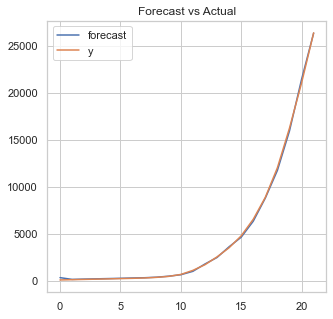

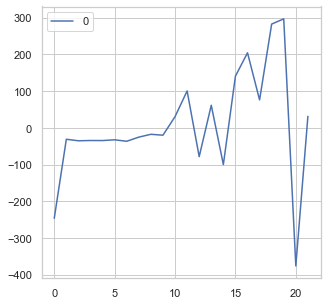

In [96]:
fit_model.plot_predict()
plt.title('Forecast vs Actual')
pd.DataFrame(fit_model.resid).plot()


**Forecasting future Values**

In [97]:
forcast = fit_model.forecast(steps=5)
pred_y = forcast[0].tolist()
pd.DataFrame(pred_y)

0
0  32182.239773
1  38427.364347
2  45081.061450
3  52117.084018
4  59513.430821

# **LSTM**

In [98]:
dataset = pd.DataFrame(data)
dataset.columns = ['Confirmed']
dataset.head()

Confirmed
confirmed_date           
2020-02-09           27.0
2020-02-10           28.0
2020-02-11           28.0
2020-02-12           28.0
2020-02-13           28.0

In [99]:
data = np.array(dataset).reshape(-1, 1)
train_data = dataset[:len(dataset)-5]
test_data = dataset[len(dataset)-5:]

**Modeling**

In [100]:
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
n_input =5
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (n_input, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm_model.fit(generator, epochs = 21)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Epoch 1/21
14/14 [==============================] - 2s 119ms/step - loss: 0.1301
Epoch 2/21
14/14 [==============================] - 0s 8ms/step - loss: 0.0923
Epoch 3/21
14/14 [==============================] - 0s 8ms/step - loss: 0.1022
Epoch 4/21
14/14 [==============================] - 0s 11ms/step - loss: 0.0735
Epoch 5/21
14/14 [==============================] - 0s 7ms/step - loss: 0.0609
Epoch 6/21
14/14 [==============================] - 0s 9ms/step - loss: 0.0397
Epoch 7/21
14/14 [==============================] - 0s 12ms/step - loss: 0.0237
Epoch 8/21
14/14 [==============================] - 0s 11ms/step - loss: 0.0131
Epoch 9/21
14/14 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 10/21
14/14 [==============================] - 0s 9ms/step - loss: 0.0272
Epoch 11/21
14/14 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 12/21
14/14 [==============================] - 0s 12ms/step - loss: 0.0160
Epoch 13/21
14/14 [========================

**Plottting Loss**

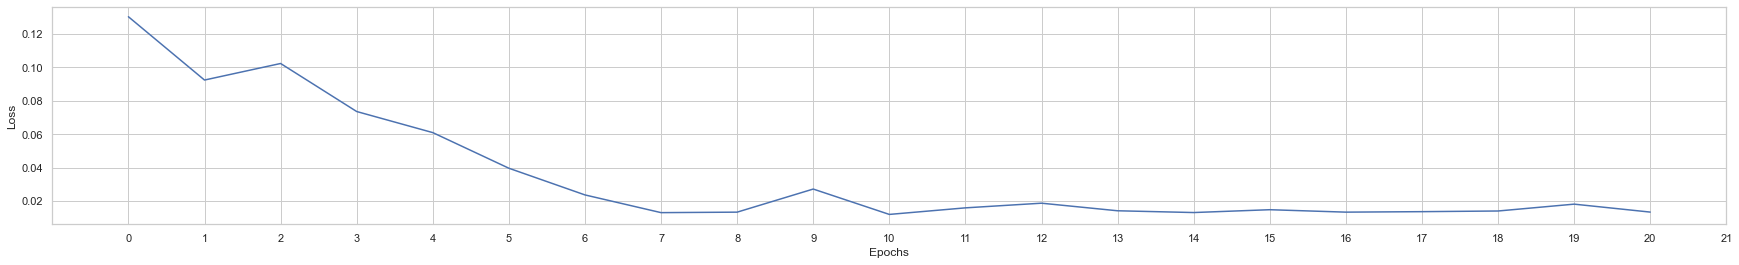

In [101]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (30,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,100,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [102]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

**Prediction**

In [103]:
prediction = pd.DataFrame(scaler.inverse_transform(lstm_predictions_scaled))
prediction.head()

0
0  2257.364568
1  2840.427789
2  3451.070031
3  4162.176607
4  4838.840709

# **Looking into time data**

In [104]:
df_time = pd.read_csv("Time.csv")

In [105]:
df_time.head()

date  time  test  negative  confirmed  released  deceased
0  2020-01-20    16     1         0          1         0         0
1  2020-01-21    16     1         0          1         0         0
2  2020-01-22    16     4         3          1         0         0
3  2020-01-23    16    22        21          1         0         0
4  2020-01-24    16    27        25          2         0         0

**Shape of data**

In [106]:
df_time.shape

(92, 7)

In [107]:
confirm_perc=(df_time['acc_confirmed'].sum()+ df_time['new_confirmed'].sum())/(df_time['acc_test'].sum() + df_time['new_test'].sum())*100
released_perc=(df_time['acc_released'].sum()+ df_time['new_released'].sum())/(df_time['acc_test'].sum() + df_time['new_test'].sum())*100
deceased_perc=(df_time['acc_deceased'].sum()+ df_time['new_deceased'].sum())/(df_time['acc_test'].sum() + df_time['new_test'].sum())*100

KeyError: 'acc_confirmed'

In [ ]:
print("The percentage of confirm  is "+ str(confirm_perc) )
print("The percentage of released is "+ str(released_perc) )
print("The percentage of deceased is "+ str(deceased_perc) )

In [ ]:
df_time = df_time.tail(15)

# **Test vs Confirmed**

In [ ]:
plt.figure(figsize=(100,30))
plt.bar(df_time.date, df_time.acc_test,label="Test")
plt.bar(df_time.date, df_time.acc_confirmed, label = "Confirmed")
plt.xlabel('Date')
plt.ylabel("Count")
plt.title('Test vs Confirmed',fontsize=100)
plt.legend(frameon=True, fontsize=12)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(100, 30))
ax=sns.scatterplot(x="date", y="acc_test", data=df_time,
             color="blue")
ax=sns.scatterplot(x="date", y="acc_confirmed", data=df_time,
             color="orange")


plt.plot(df_time.date,df_time.acc_test,zorder=1)
plt.plot(df_time.date,df_time.acc_confirmed,zorder=1,color="orange")
plt.title('Test vs Confirmed',fontsize=100)



# **Graphical representaion of new People Test and Confirmed**

In [ ]:
plt.figure(figsize=(100,30))
plt.bar(df_time.date, df_time.new_test,label="Test")
plt.bar(df_time.date, df_time.new_confirmed, label = "Confirmed")
plt.xlabel('Date')
plt.ylabel("Count")
plt.title('New Test vs New Confirmed',fontsize=100)

plt.legend(frameon=True, fontsize=12)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(100, 30))
ax=sns.scatterplot(x="date", y="new_test", data=df_time,
             color="blue")
ax=sns.scatterplot(x="date", y="new_confirmed", data=df_time,
             color="orange")


plt.plot(df_time.date,df_time.new_test,zorder=1)
plt.plot(df_time.date,df_time.new_confirmed,zorder=1,color="orange")
plt.title('Test vs Confirmed',fontsize=100)


As the condition is very critical in South Korea nowadays. The graph shown here represents the number of test cases over the number of confirmed cases date wise. We can clearly see here upto date 28th of jan 2020 condition was under control but after 28th of jan to 6th of feb there is a slight increase in graph. After 6th the graph has been increased linearly for the test cases but remains zero for deceased. After screening around 20,000 people  it was found that around 200+ people were infected .

# **Graphical representaion of   Confirmed vs State of Patient **

In [ ]:
plt.figure(figsize=(100,30))
plt.bar(df_time.date, df_time.acc_confirmed, label = "Confirmed")
plt.bar(df_time.date, df_time.acc_released,label="released")
plt.bar(df_time.date, df_time.acc_deceased,label="deceased")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(100, 30))
ax=sns.scatterplot(x="date", y="new_confirmed", data=df_time,
             color="red",label = "confirmed")
ax=sns.scatterplot(x="date", y="new_released", data=df_time,
             color="blue",label = "released")
ax=sns.scatterplot(x="date", y="new_deceased", data=df_time,
             color="orange",label = "deceased")
plt.plot(df_time.date,df_time.new_released,zorder=1,color="blue")
plt.plot(df_time.date,df_time.new_deceased,zorder=1,color="orange")
plt.plot(df_time.date,df_time.new_confirmed,zorder=1,color="red")


# **Graphical representaion of  new Confirmed vs State of Patient **

In [ ]:
plt.figure(figsize=(100,30))
plt.bar(df_time.date, df_time.new_confirmed, label = "Confirmed")
plt.bar(df_time.date, df_time.new_released,label="released")
plt.bar(df_time.date, df_time.new_deceased,label="deceased")
plt.xlabel('Date')
plt.ylabel("Count")
plt.xticks(fontsize=35)
plt.yticks(fontsize=30)

plt.legend(frameon=True, fontsize=12)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(100, 30))
ax=sns.scatterplot(x="date", y="new_confirmed", data=df_time,
             color="red",label = "confirmed")
ax=sns.scatterplot(x="date", y="new_released", data=df_time,
             color="blue",label = "released")
ax=sns.scatterplot(x="date", y="new_deceased", data=df_time,
             color="orange",label = "deceased")
plt.plot(df_time.date,df_time.new_released,zorder=1,color="blue")
plt.plot(df_time.date,df_time.new_deceased,zorder=1,color="orange")
plt.plot(df_time.date,df_time.new_confirmed,zorder=1,color="red")


**Looking into Trend file**

In [ ]:
trend = pd.read_csv("../input/trend1/trend.csv")

In [ ]:
trend.head()

# **No of time Coronavirus search?**

In [ ]:
f, ax = plt.subplots(figsize=(15,2))
h=pd.pivot_table(trend,columns='date',values=["coronavirus"])
sns.heatmap(h,cmap=['skyblue','red','green'],linewidths=0.05)

****Description of Trending Word****

In [ ]:
trend.describe().T

**Trend data of the keywords searched in NAVER which is one of the largest portal in South Korea**

**Plotting Graph of keywork search per 100 people recently**

In [ ]:
trend_last30 = trend.tail(30)
tl3 = trend_last30

In [ ]:
f, ax = plt.subplots(figsize=(50, 20))
sns.set_style("dark")
ax=sns.scatterplot(x="date", y="coronavirus", data=tl3,
             color="black",label = "coronavirus")
ax=sns.scatterplot(x="date", y="flu", data=tl3,
             color="red",label = "flu")
ax=sns.scatterplot(x="date", y="cold", data=tl3,
             color="blue",label = "cold")
ax=sns.scatterplot(x="date", y="pneumonia", data=tl3,
             color="orange",label = "pneumonia")
plt.plot(tl3.date,tl3.coronavirus,zorder=1,color="black")
plt.plot(tl3.date,tl3.cold,zorder=1,color="blue")
plt.plot(tl3.date,tl3.pneumonia,zorder=1,color="orange")
plt.plot(tl3.date,tl3.flu,zorder=1,color="red")

# **Comparision with other Country**

In [ ]:
comp_table = pd.DataFrame(comp.describe().T)


In [ ]:
comp_table


In [ ]:
comp = comp.loc[:,["Korea, South","US","Italy","France","China","Japan"]]


In [ ]:
comp.plot()


****Weather in South Korea****

In [ ]:
weather = weather.loc[:,["province","avg_relative_humidity"]]

In [ ]:
weather = weather.rename(columns={"avg_relative_humidity":"humidity"})

In [ ]:
weather.head()

In [ ]:
weather_min = weather.groupby("province")[["humidity"]].min().reset_index()
weather_avg = weather.groupby("province")[["humidity"]].mean().reset_index()
weather_max = weather.groupby("province")[["humidity"]].max().reset_index()


**Description of Minimum Humidity**

In [ ]:
weather_min.describe().T

**Description of Average Humidity**

In [ ]:
weather_avg.describe().T

**Description of Maximum Humidity**

In [ ]:
weather_max.describe().T

**Minimum Humidity**

In [ ]:
fig = px.bar(weather_min[['province', 'humidity']].sort_values('humidity', ascending=False), 
             y="humidity", x="province", color='province', 
             log_y=True, template='ggplot2', title='Minimum humidity ')
fig.show()

In [ ]:

fig = px.treemap(weather_min, path=['province'], values='humidity',
                  color='humidity', hover_data=['province'],
                  color_continuous_scale='Rainbow')
fig.show()

In [ ]:
fig = px.pie(weather_min,
             values="humidity",
             names="province",
             title="Minimum Humidity",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

**Average Humidity**

In [ ]:
fig = px.bar(weather_avg[['province', 'humidity']].sort_values('humidity', ascending=False), 
             y="humidity", x="province", color='province', 
             log_y=True, template='ggplot2', title='Minimum humidity ')
fig.show()

In [ ]:

fig = px.treemap(weather_avg, path=['province'], values='humidity',
                  color='humidity', hover_data=['province'],
                  color_continuous_scale='Rainbow')
fig.show()

In [ ]:
fig = px.pie(weather_avg,
             values="humidity",
             names="province",
             title="Average Humidity",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

**Maximum Humidity**

In [ ]:
fig = px.bar(weather_max[['province', 'humidity']].sort_values('humidity', ascending=False), 
             y="humidity", x="province", color='province', 
             log_y=True, template='ggplot2', title='Minimum humidity ')
fig.show()

In [ ]:

fig = px.treemap(weather_max, path=['province'], values='humidity',
                  color='humidity', hover_data=['province'],
                  color_continuous_scale='burgyl')
fig.show()

In [ ]:
fig = px.pie(weather_max,
             values="humidity",
             names="province",
             title="Maximum Humidity",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

**Humidity**

In [ ]:
f, ax = plt.subplots(figsize=(38,10))
plt.plot(weather_min.province,weather_min.humidity,zorder=1,color="black")
plt.plot(weather_avg.province,weather_avg.humidity,zorder=1,color="red")
plt.plot(weather_max.province,weather_max.humidity,zorder=1,color="blue")

**Prevention**  
![](http://defiancelibrary.org/images/CoronaVirusInfo.jpg)
   To avoid the critical situation people are suggested to do following things  
*     Avoid contact with people who are sick. 
*     Avoid touching your eyes, nose, and mouth. 
*     Stay home when you are sick. 
*     Cover your cough or sneeze with a tissue, then throw the tissue in the trash. 
*    Clean and disinfect frequently touched objects and surfaces using a regular household  
*    Wash your hands often with soap and water, especially after going to the bathroom; before eating; and after blowing     your nose, coughing, or sneezing. If soap and water are not readily available, use an alcohol-based hand sanitizer.